### Introduction

In this section, we introduce our analysis of the "cal" corpus from the DraCor project. Our goal is to iterate over the plays, extract metadata fields (such as averageClustering, density, averagePathLength, etc.), and then plot various aspects against the normalized year. This notebook is structured into several parts: importing libraries, fetching and processing data, performing calculations, and visualizing the results.

### Importing Required Libraries

In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


### Fetching Data from the DraCor API

Assuming the DraCor API provides an endpoint that lets you query all plays in the corpus "cal", we send a GET request to retrieve the plays.

In [42]:
# save base URL in variable  
API_URL = "https://dracor.org/api/v1/"

Build the full endpoint for the plays in the "cal" corpus like so:

In [43]:
corpusname = "cal"
endpoint = f"{BASE_URL}plays/{corpus}"
response = requests.get(endpoint)

### Processing the Metadata

for i in range(10): # get corpusname with user input # save corpusname in variable corpusname = str(input("Please choose a corpusname from the list above. Enter the abbreviation: ")) if corpusname not in corpus_abbreviations: print("The abbreviation you selected is not in the list. Please enter the abbreviation again.") else: print("Success!") break else: corpusname = "cal"

In [44]:
# save corpora parameter (with slash) and metadata parameter in variables
CORPORA_EXT = "corpora/"
METADAT_EXT = "/metadata"

# build URL
corpus_metadata_path = API_URL + CORPORA_EXT + corpusname + METADAT_EXT
print(f"URL for getting the metadata of a specific corpus: {corpus_metadata_path}\n")


# perform request
metadata_file = requests.get(corpus_metadata_path, headers={"accept": "text/csv"}, stream=True)
metadata_file.raw.decode_content=True

# read metadata to DataFrame
metadata_df = pd.read_csv(metadata_file.raw, sep=",", encoding="utf-8")

URL for getting the metadata of a specific corpus: https://dracor.org/api/v1/corpora/cal/metadata



### Inspect metadata

In [45]:
# display first five lines of the retrieved metadata 
metadata_df.head()


,name,id,wikidataId,firstAuthor,numOfCoAuthors,title,subtitle,normalizedGenre,digitalSource,originalSourcePublisher,...,numEdges,yearWritten,numOfSegments,wikipediaLinkCount,numOfActs,wordCountText,wordCountSp,wordCountStage,numOfP,numOfL
0,a-dios-por-razon-de-estado,cal000001,Q5654107,Calderón,0,A Dios por razón de estado,NaN,NaN,http://www.cervantesvirtual.com/obra-visor/a-d...,NaN,...,129,NaN,12,1.0,1,9898,9539,361,0,1999
1,a-maria-el-corazon,cal000002,Q68897761,Calderón,0,A María el corazón,Auto historial alegórico,NaN,http://www.cervantesvirtual.com/obra-visor/a-m...,NaN,...,87,NaN,34,0.0,1,8843,8079,787,0,1722
2,a-secreto-agravio-secreta-venganza,cal000055,Q5654467,Calderón,0,"A secreto agravio, secreta venganza",Comedia Famosa,NaN,http://www.cervantesvirtual.com/obra-visor/a-s...,NaN,...,34,1635,50,1.0,3,14299,13993,295,0,2860
3,afectos-de-odio-y-amor,cal000003,Q50307358,Calderón,0,Afectos de odio y amor,NaN,NaN,http://www.cervantesvirtual.com/obra-visor/afe...,NaN,...,80,NaN,90,0.0,3,19975,19480,543,0,4090
4,agradecer-y-no-amar,cal000056,NaN,Calderón,0,Agradecer y no amar,Gran Comedia,NaN,NaN,NaN,...,53,NaN,74,NaN,3,17760,17457,412,0,3576


Look at information available in the metadata


In [46]:
# print column names available in meta data 
metadata_df.columns

Index(['name', 'id', 'wikidataId', 'firstAuthor', 'numOfCoAuthors', 'title',
       'subtitle', 'normalizedGenre', 'digitalSource',
       'originalSourcePublisher', 'originalSourcePubPlace',
       'originalSourceYear', 'originalSourceNumberOfPages', 'yearNormalized',
       'size', 'libretto', 'averageClustering', 'density', 'averagePathLength',
       'maxDegreeIds', 'averageDegree', 'diameter', 'datePremiered',
       'yearPremiered', 'yearPrinted', 'maxDegree', 'numOfSpeakers',
       'numOfSpeakersFemale', 'numOfSpeakersMale', 'numOfSpeakersUnknown',
       'numOfPersonGroups', 'numConnectedComponents', 'numEdges',
       'yearWritten', 'numOfSegments', 'wikipediaLinkCount', 'numOfActs',
       'wordCountText', 'wordCountSp', 'wordCountStage', 'numOfP', 'numOfL'],
      dtype='object')

### 3. What to do with the metadata - More Examples

The library pandas allows us to plot selected columns against each other. If we want to see if one parameter e.g. the number of characters (as in 1) develops over time, we can set the x-axis to the years the plays were created ("yearNormalized) and the y-axis to the number of characters ("size") in the play. 

The documentation of the `plot` function can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

We are interested in the following fields:

* averageClustering
* density
* averagePathLength
* averageDegree
* diameter
* maxDegree
* numOfSpeakers
* numOfSpeakersFemale
* numOfSpeakersMale
* numOfPersonGroups
* numEdges
* numOfSegments
* yearNormalized (for plotting)
* titlel (for plotting)

#### Average Clustering

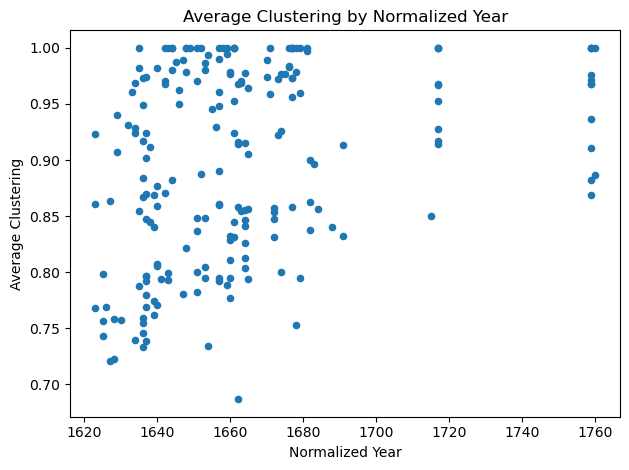

In [47]:
# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="averageClustering", kind="scatter")

# Set custom axis labels for normalized values
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Average Clustering")
ax.set_title("Average Clustering by Normalized Year")

# Adjust the layout to ensure labels and title fit
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("average_clustering_by_year.jpg", format="jpg")

# Display the plot
plt.show()

#### Density 

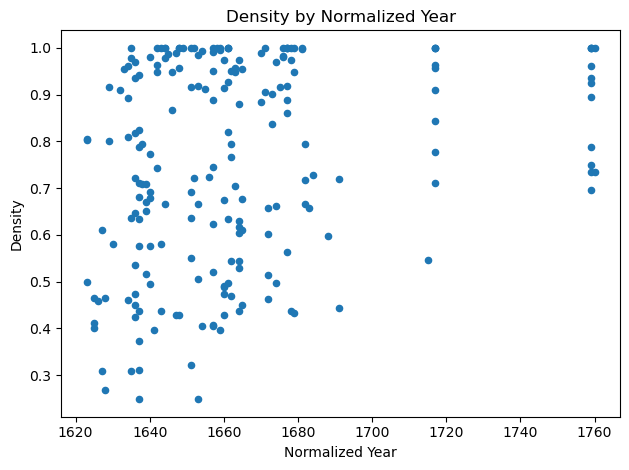

In [48]:
# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="density", kind="scatter")

# Set custom axis labels for normalized values
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Density")
ax.set_title("Density by Normalized Year")

# Adjust the layout to ensure labels and title fit
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("density_by_year.jpg", format="jpg")

# Display the plot
plt.show()

#### Average Path Length

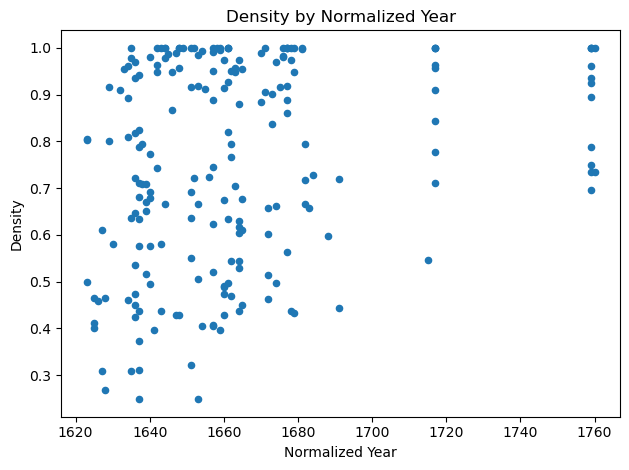

In [51]:
# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="density", kind="scatter")

# Set custom axis labels for normalized values
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Density")
ax.set_title("Density by Normalized Year")

# Adjust the layout to ensure labels and title fit
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("density_by_year.jpg", format="jpg")

# Display the plot
plt.show()

#### Average Degree

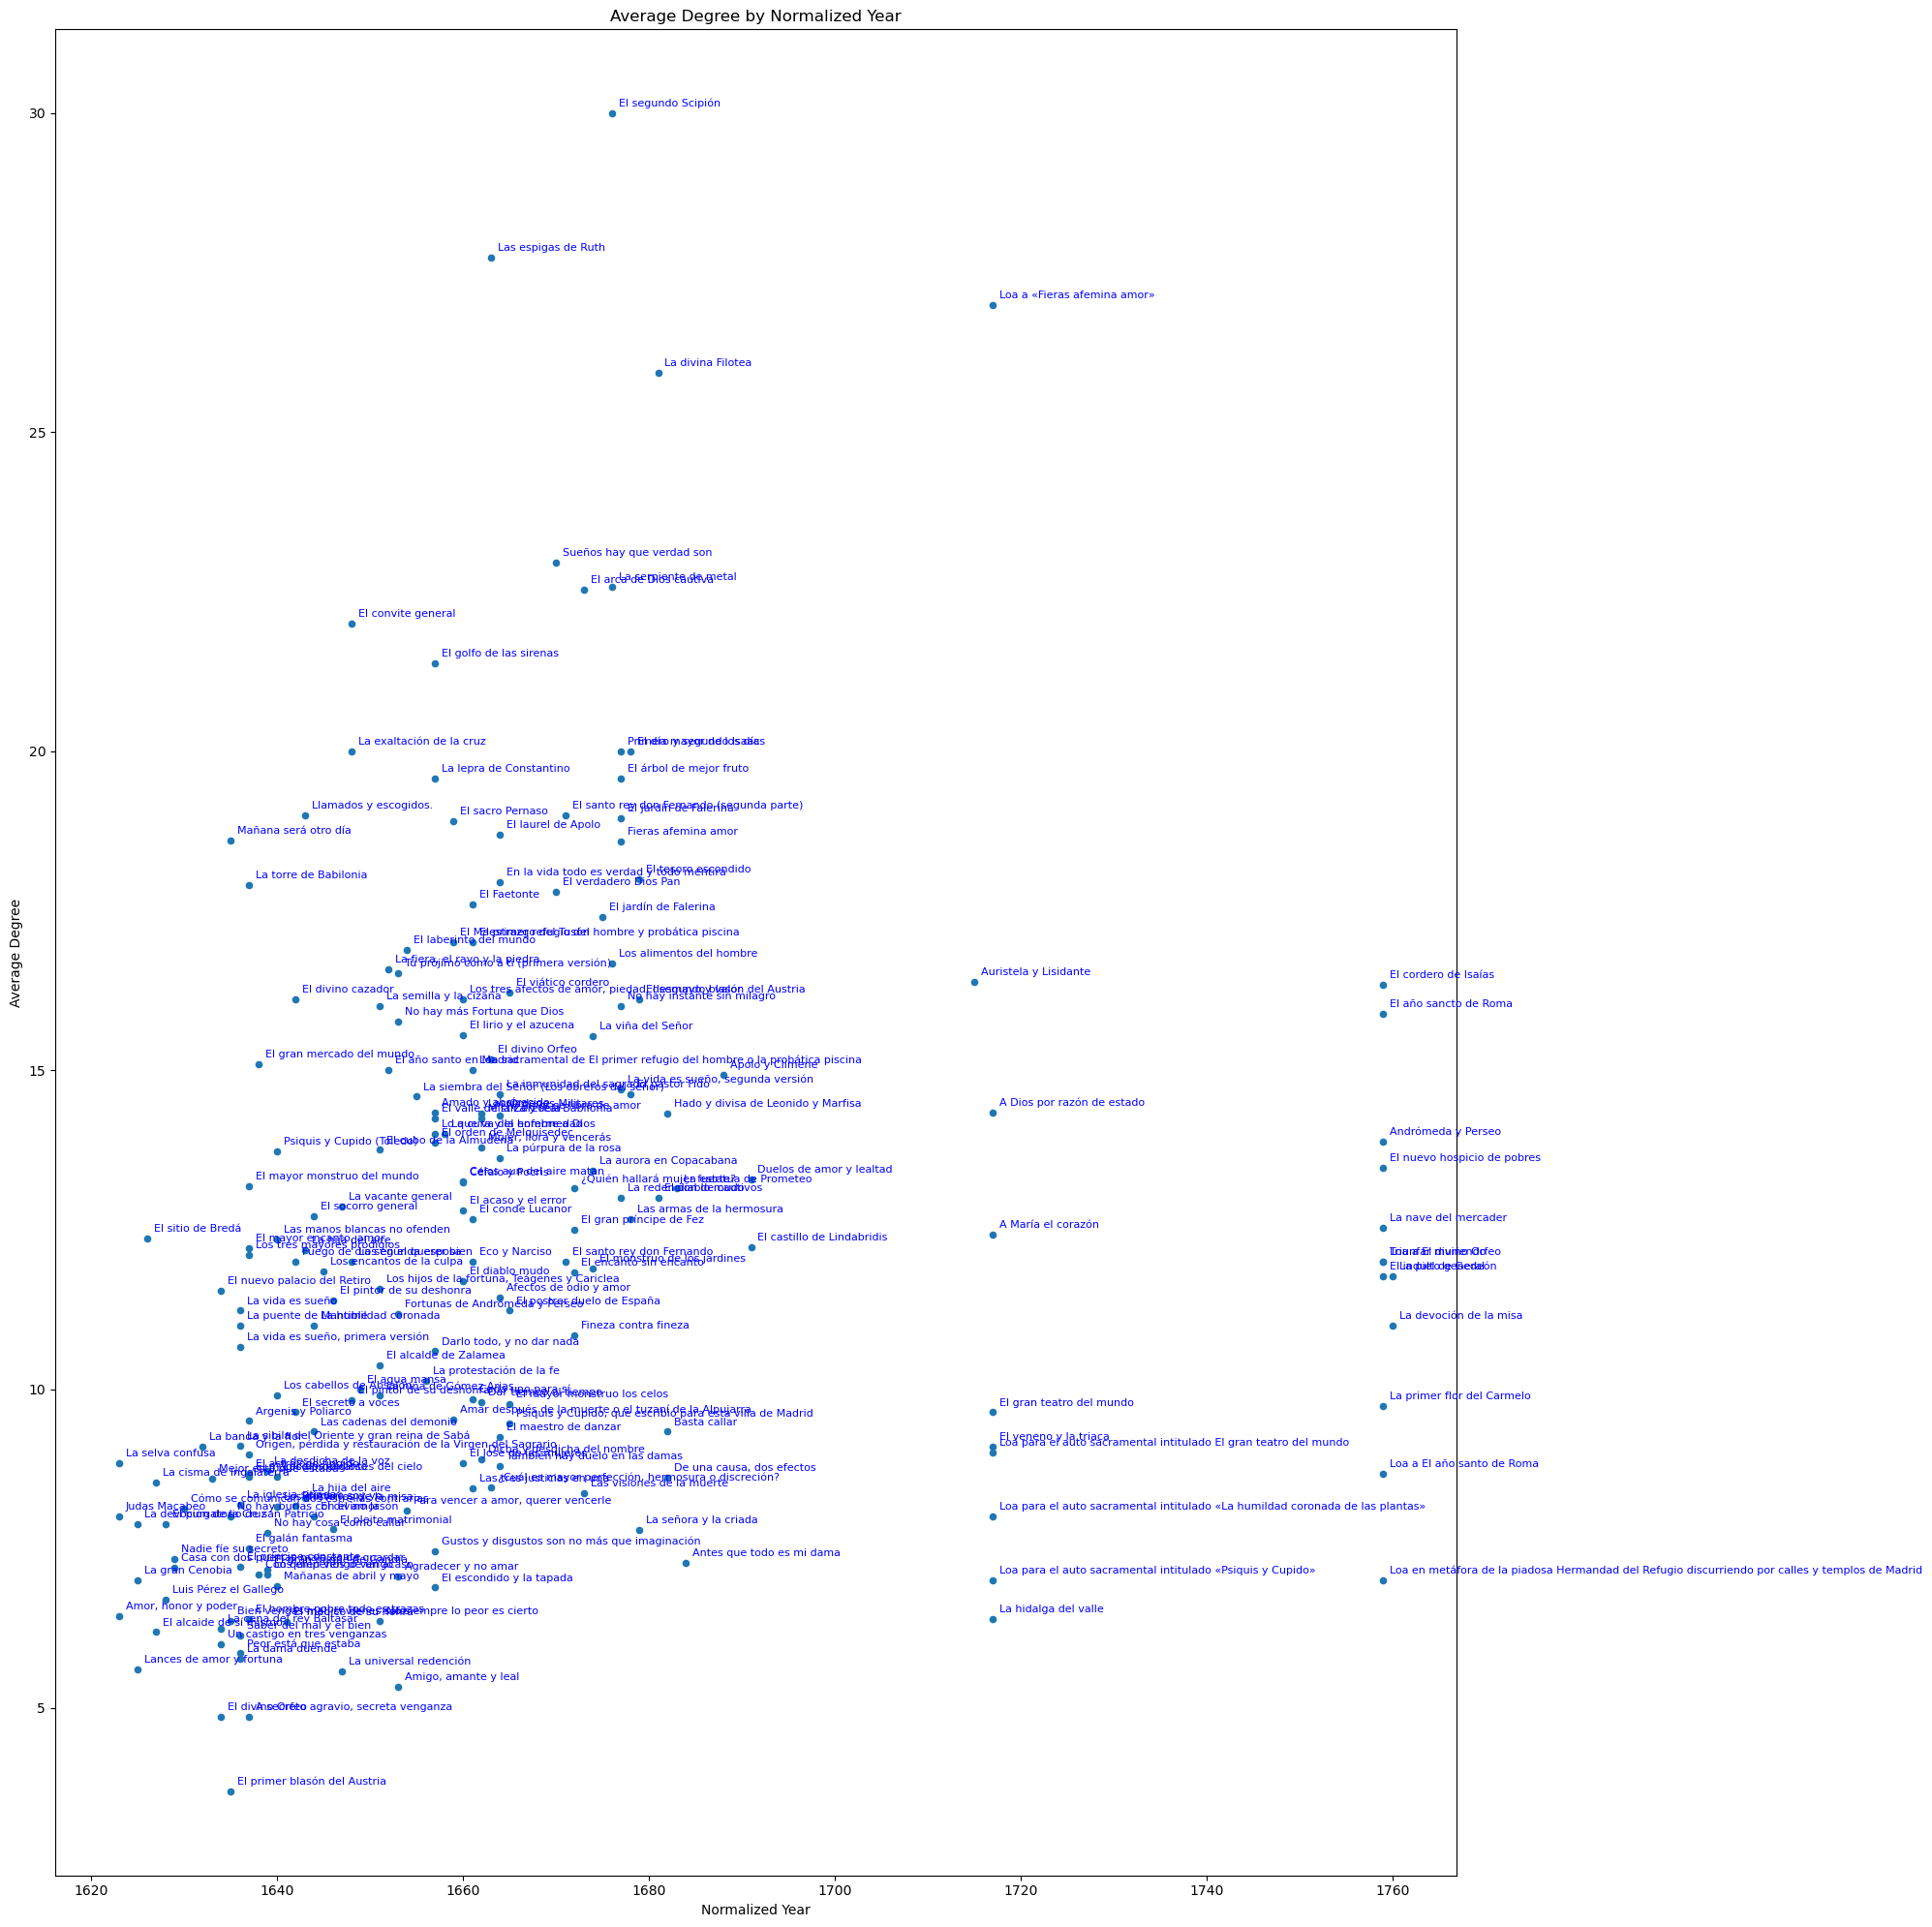

In [72]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="averageDegree", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["averageDegree"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Average Degree")
ax.set_title("Average Degree by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("density_by_year.jpg", format="jpg")
plt.show()


### Diameter

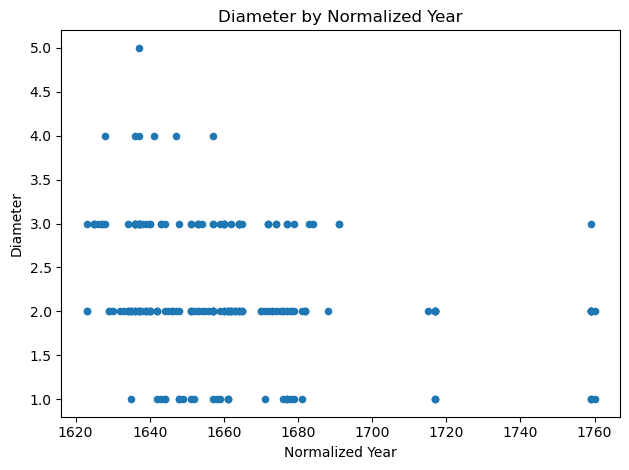

In [74]:
# Create the scatter plot
ax = metadata_df.plot(x="yearNormalized", y="diameter", kind="scatter")

# Set custom axis labels for normalized values
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Diameter")
ax.set_title("Diameter by Normalized Year")

# Adjust the layout to ensure labels and title fit
plt.tight_layout()

# Save the graph as a JPEG file
plt.savefig("diameter_by_year.jpg", format="jpg")

# Display the plot
plt.show()

#### Maximum Degree

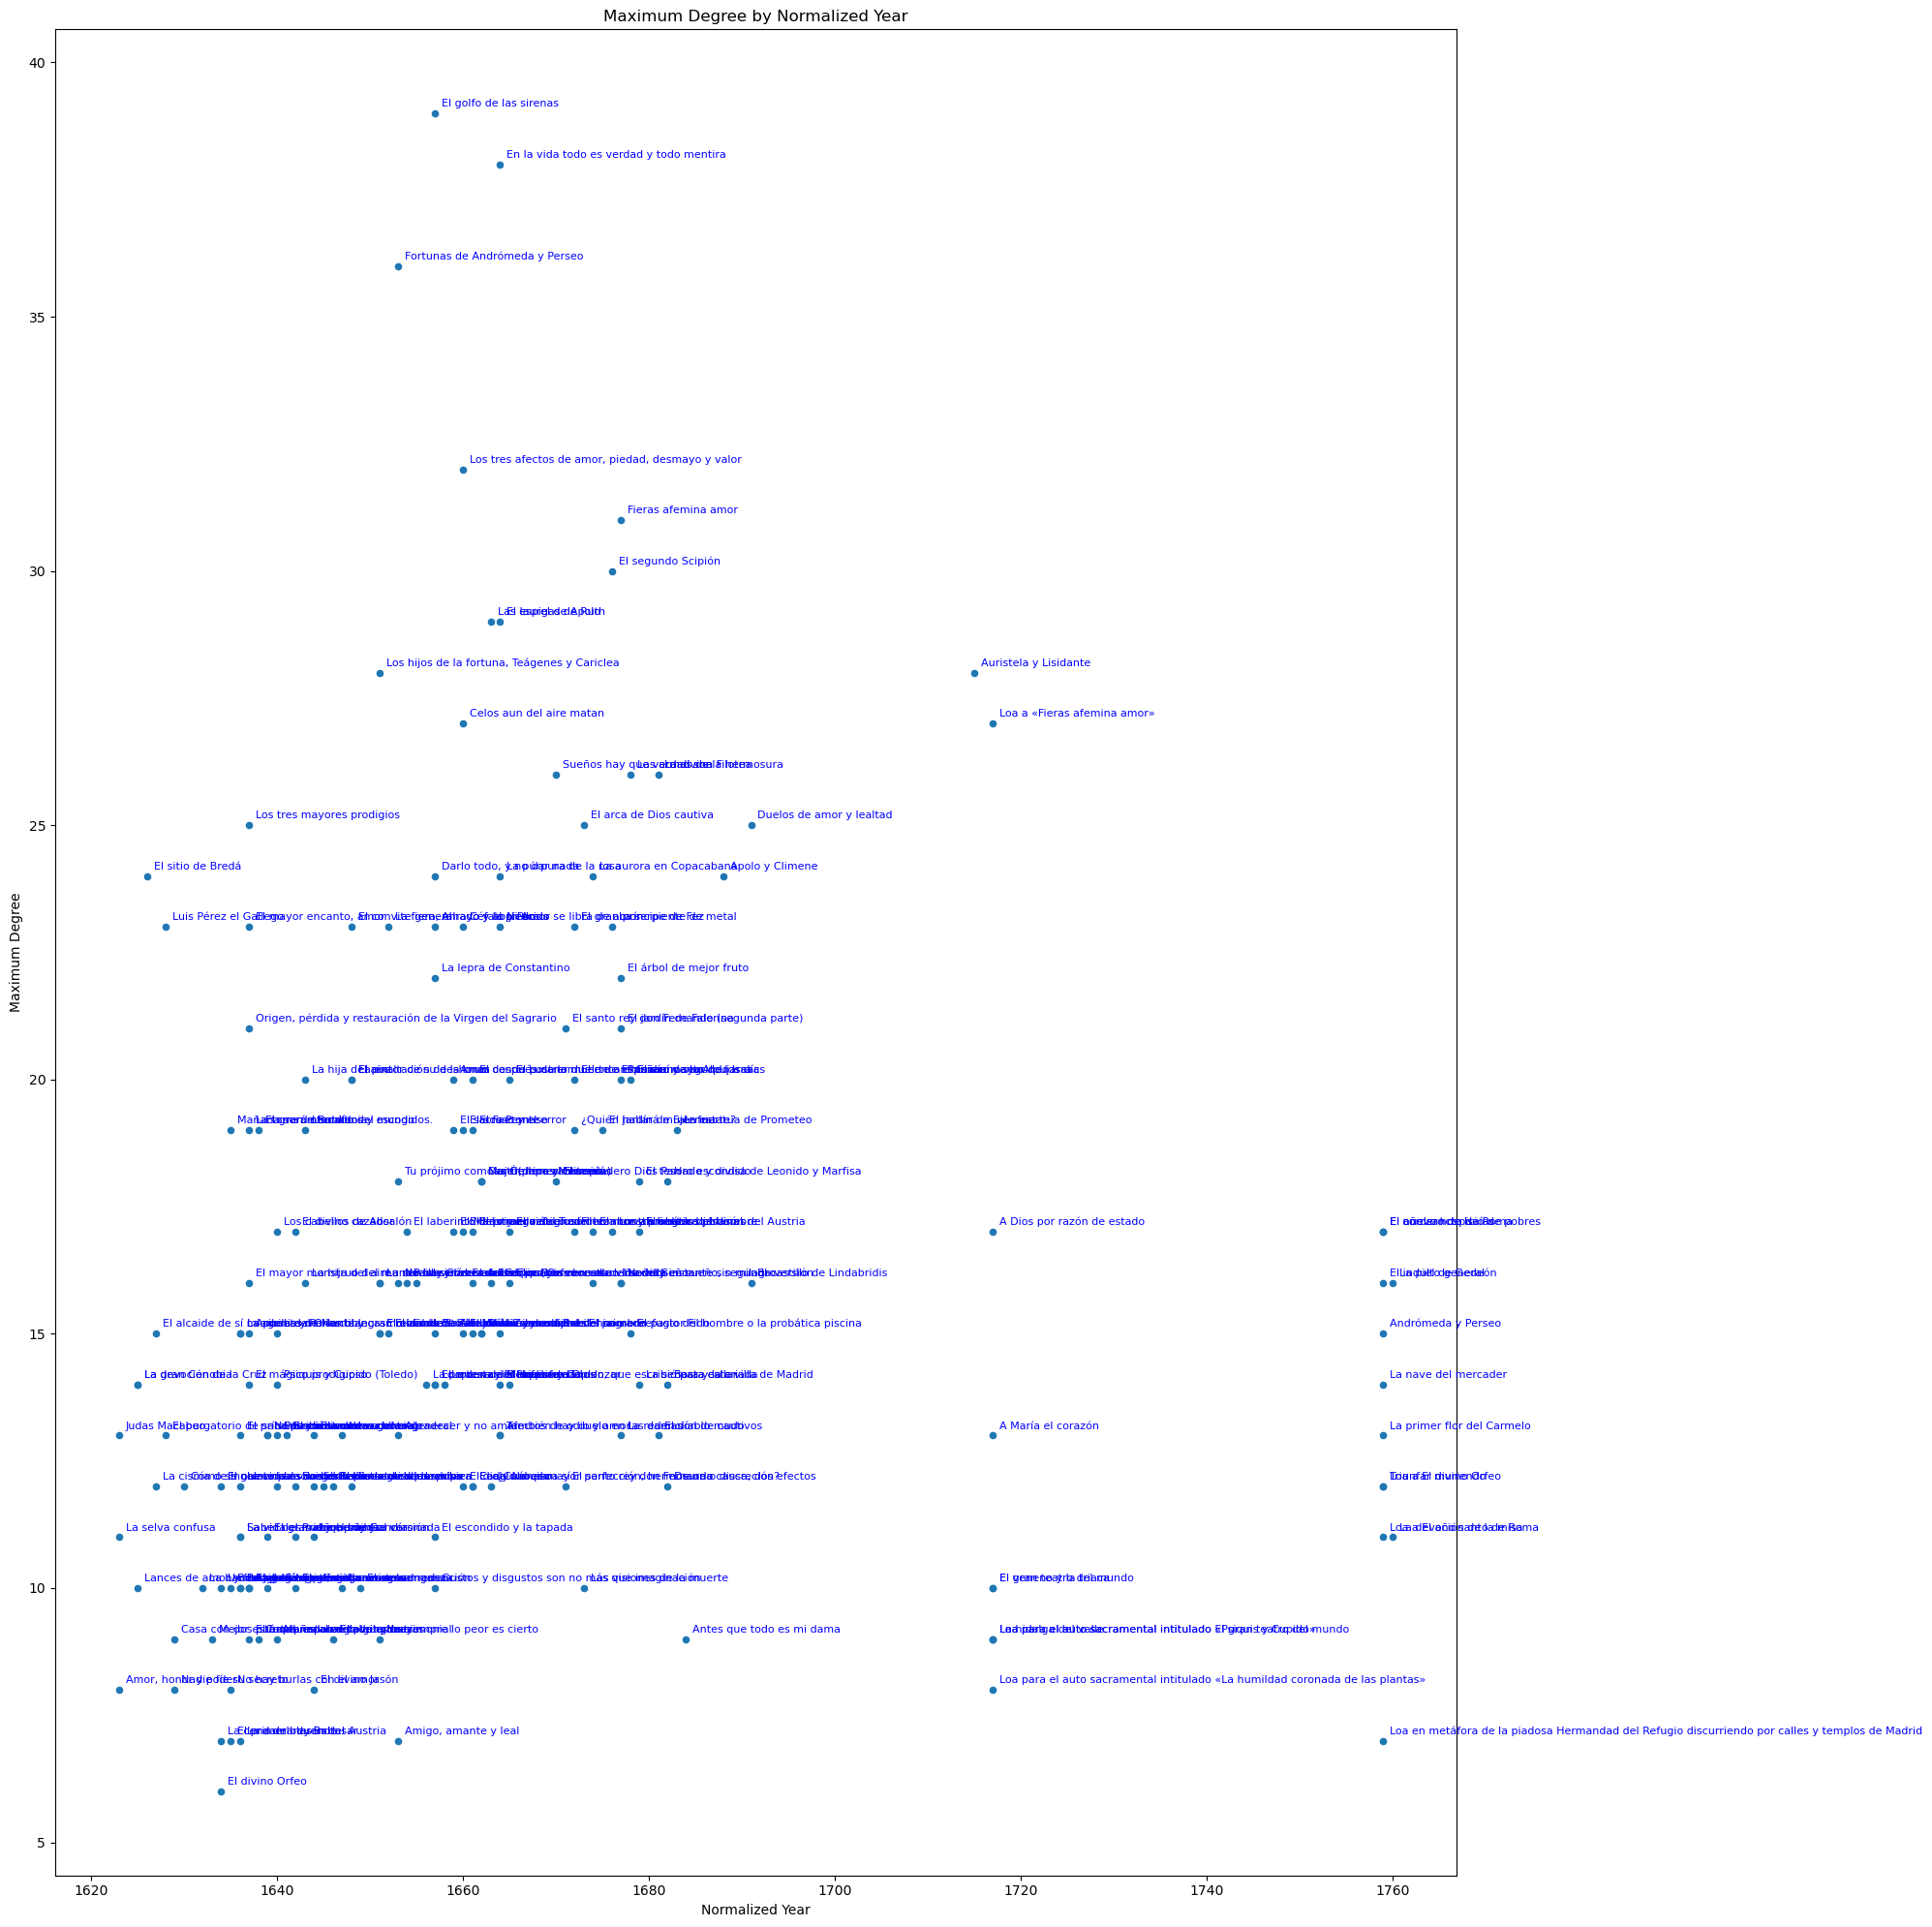

In [75]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="maxDegree", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["maxDegree"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Maximum Degree")
ax.set_title("Maximum Degree by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("maximum_degree_by_year.jpg", format="jpg")
plt.show()


#### Number of Speakers

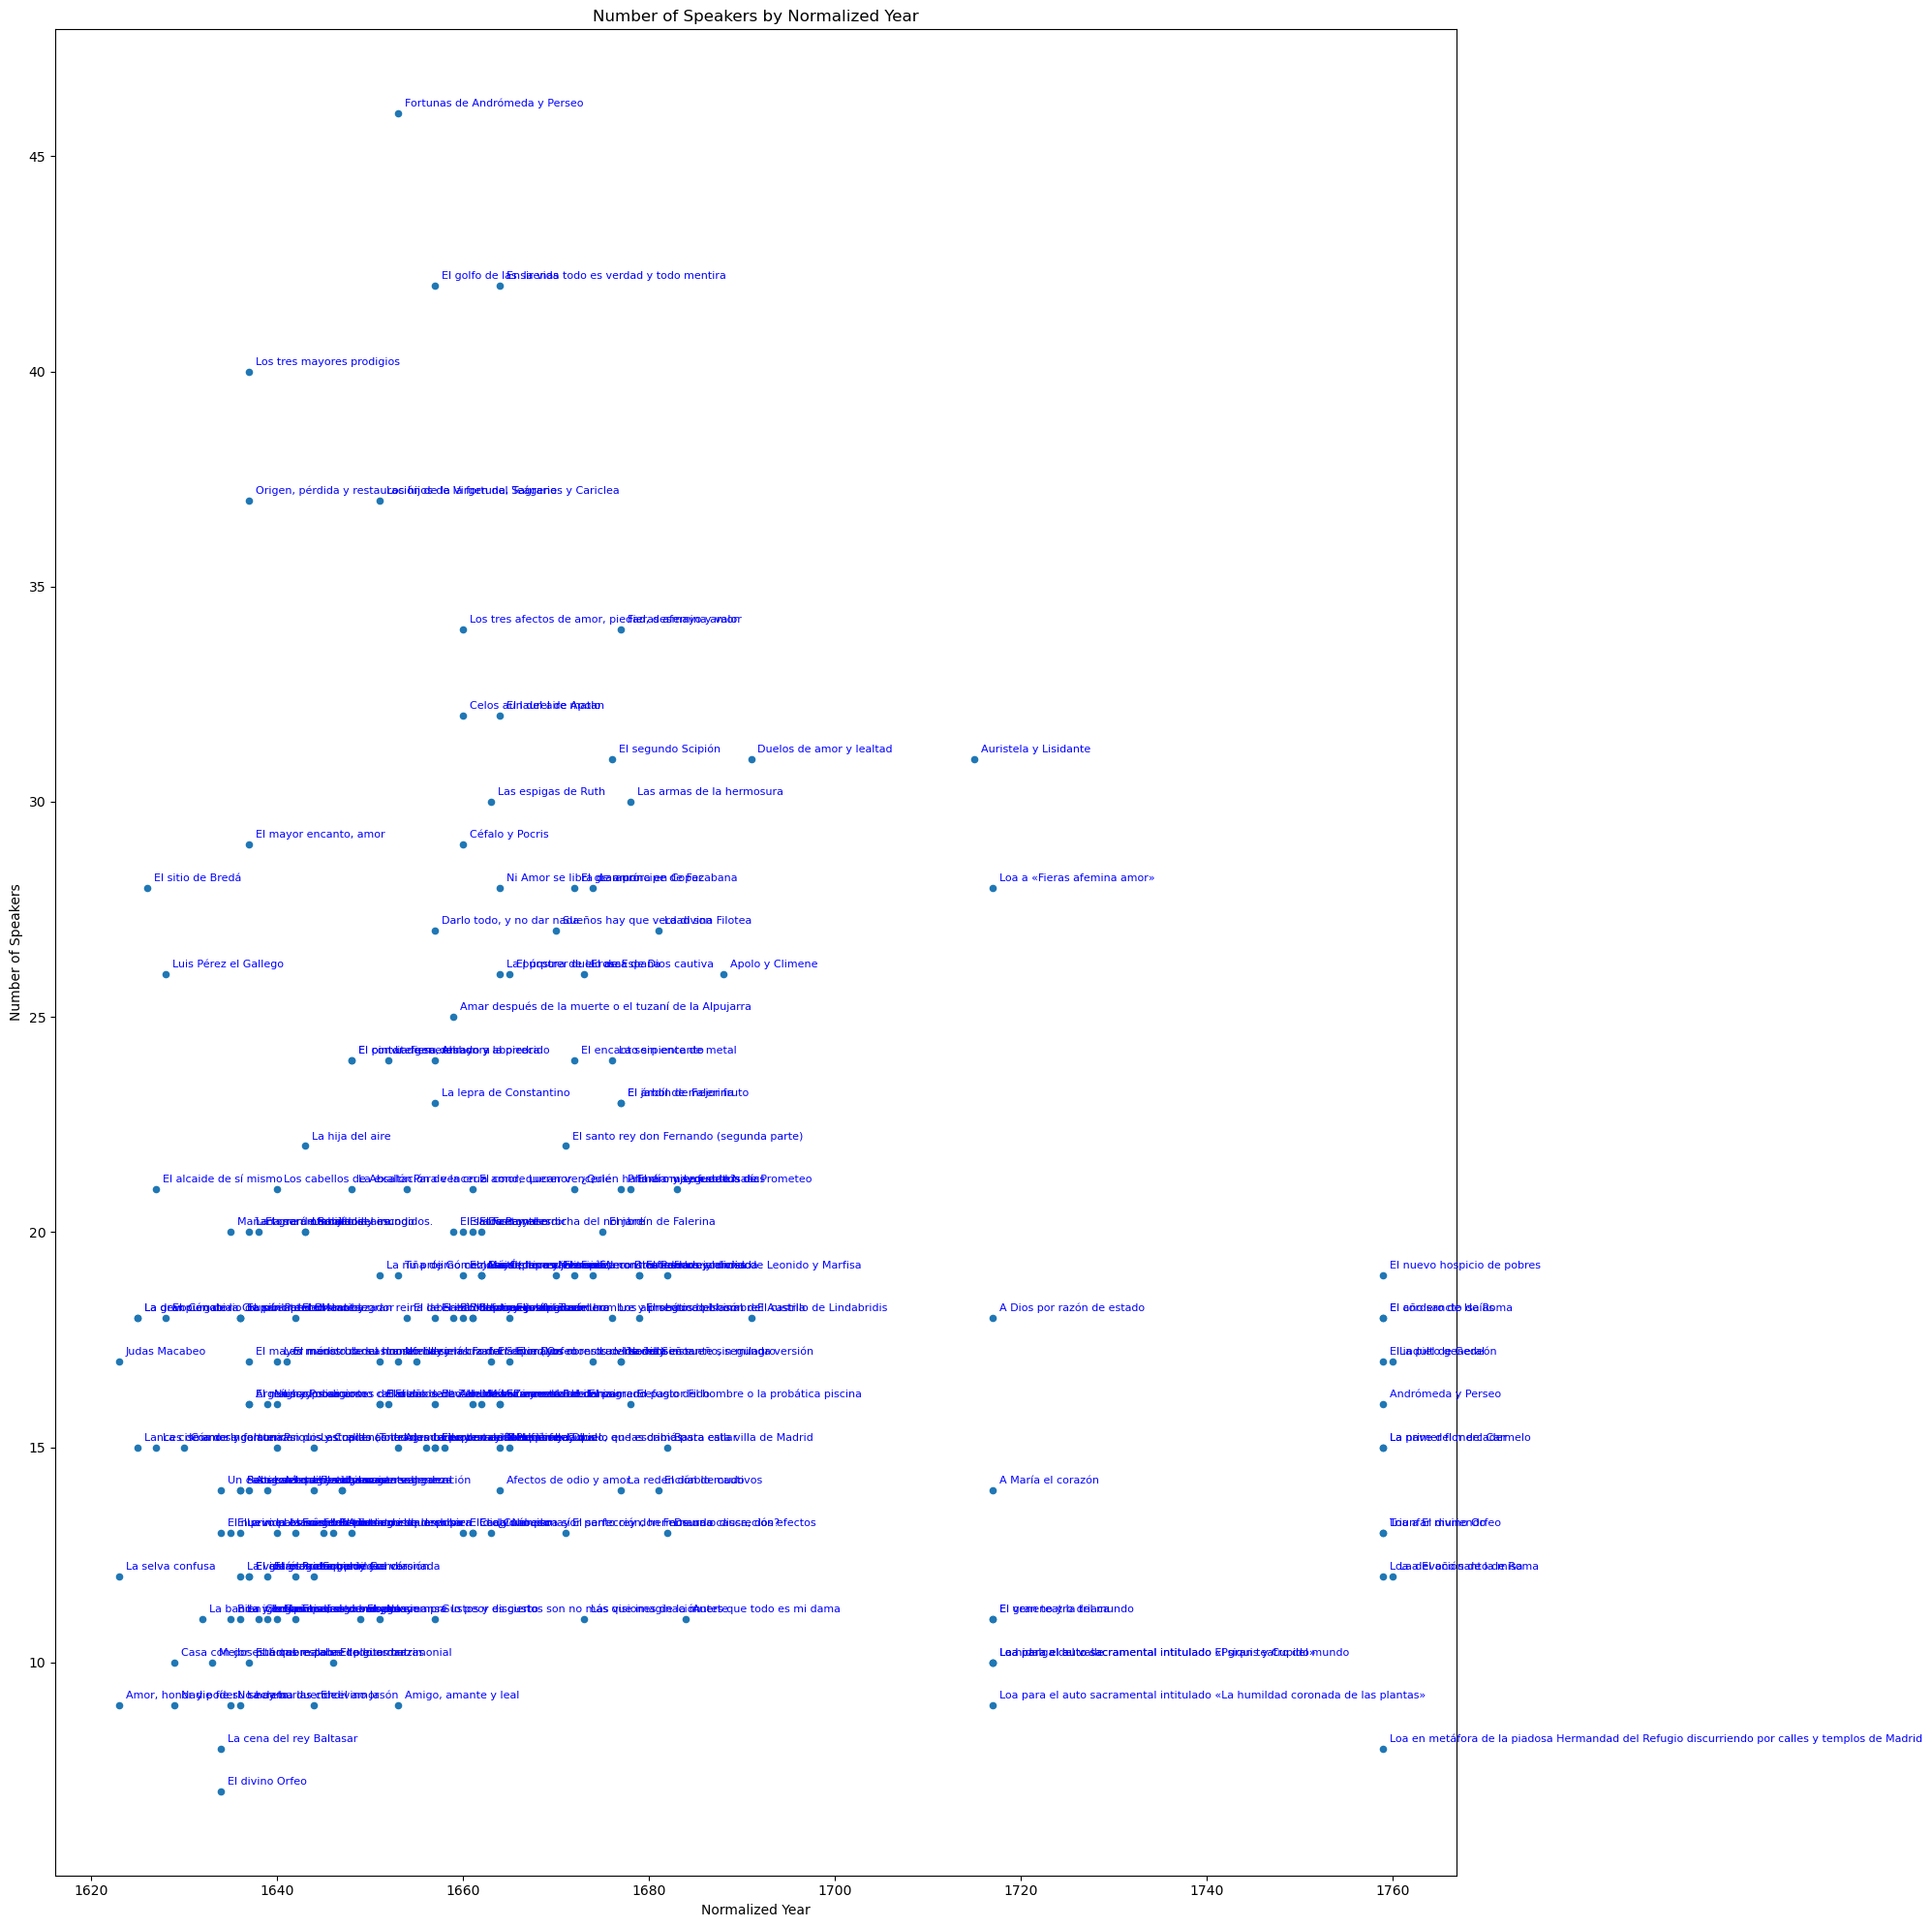

In [76]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="numOfSpeakers", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSpeakers"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Speakers")
ax.set_title("Number of Speakers by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_speakers_by_year.jpg", format="jpg")
plt.show()

#### Number of Speakers Female

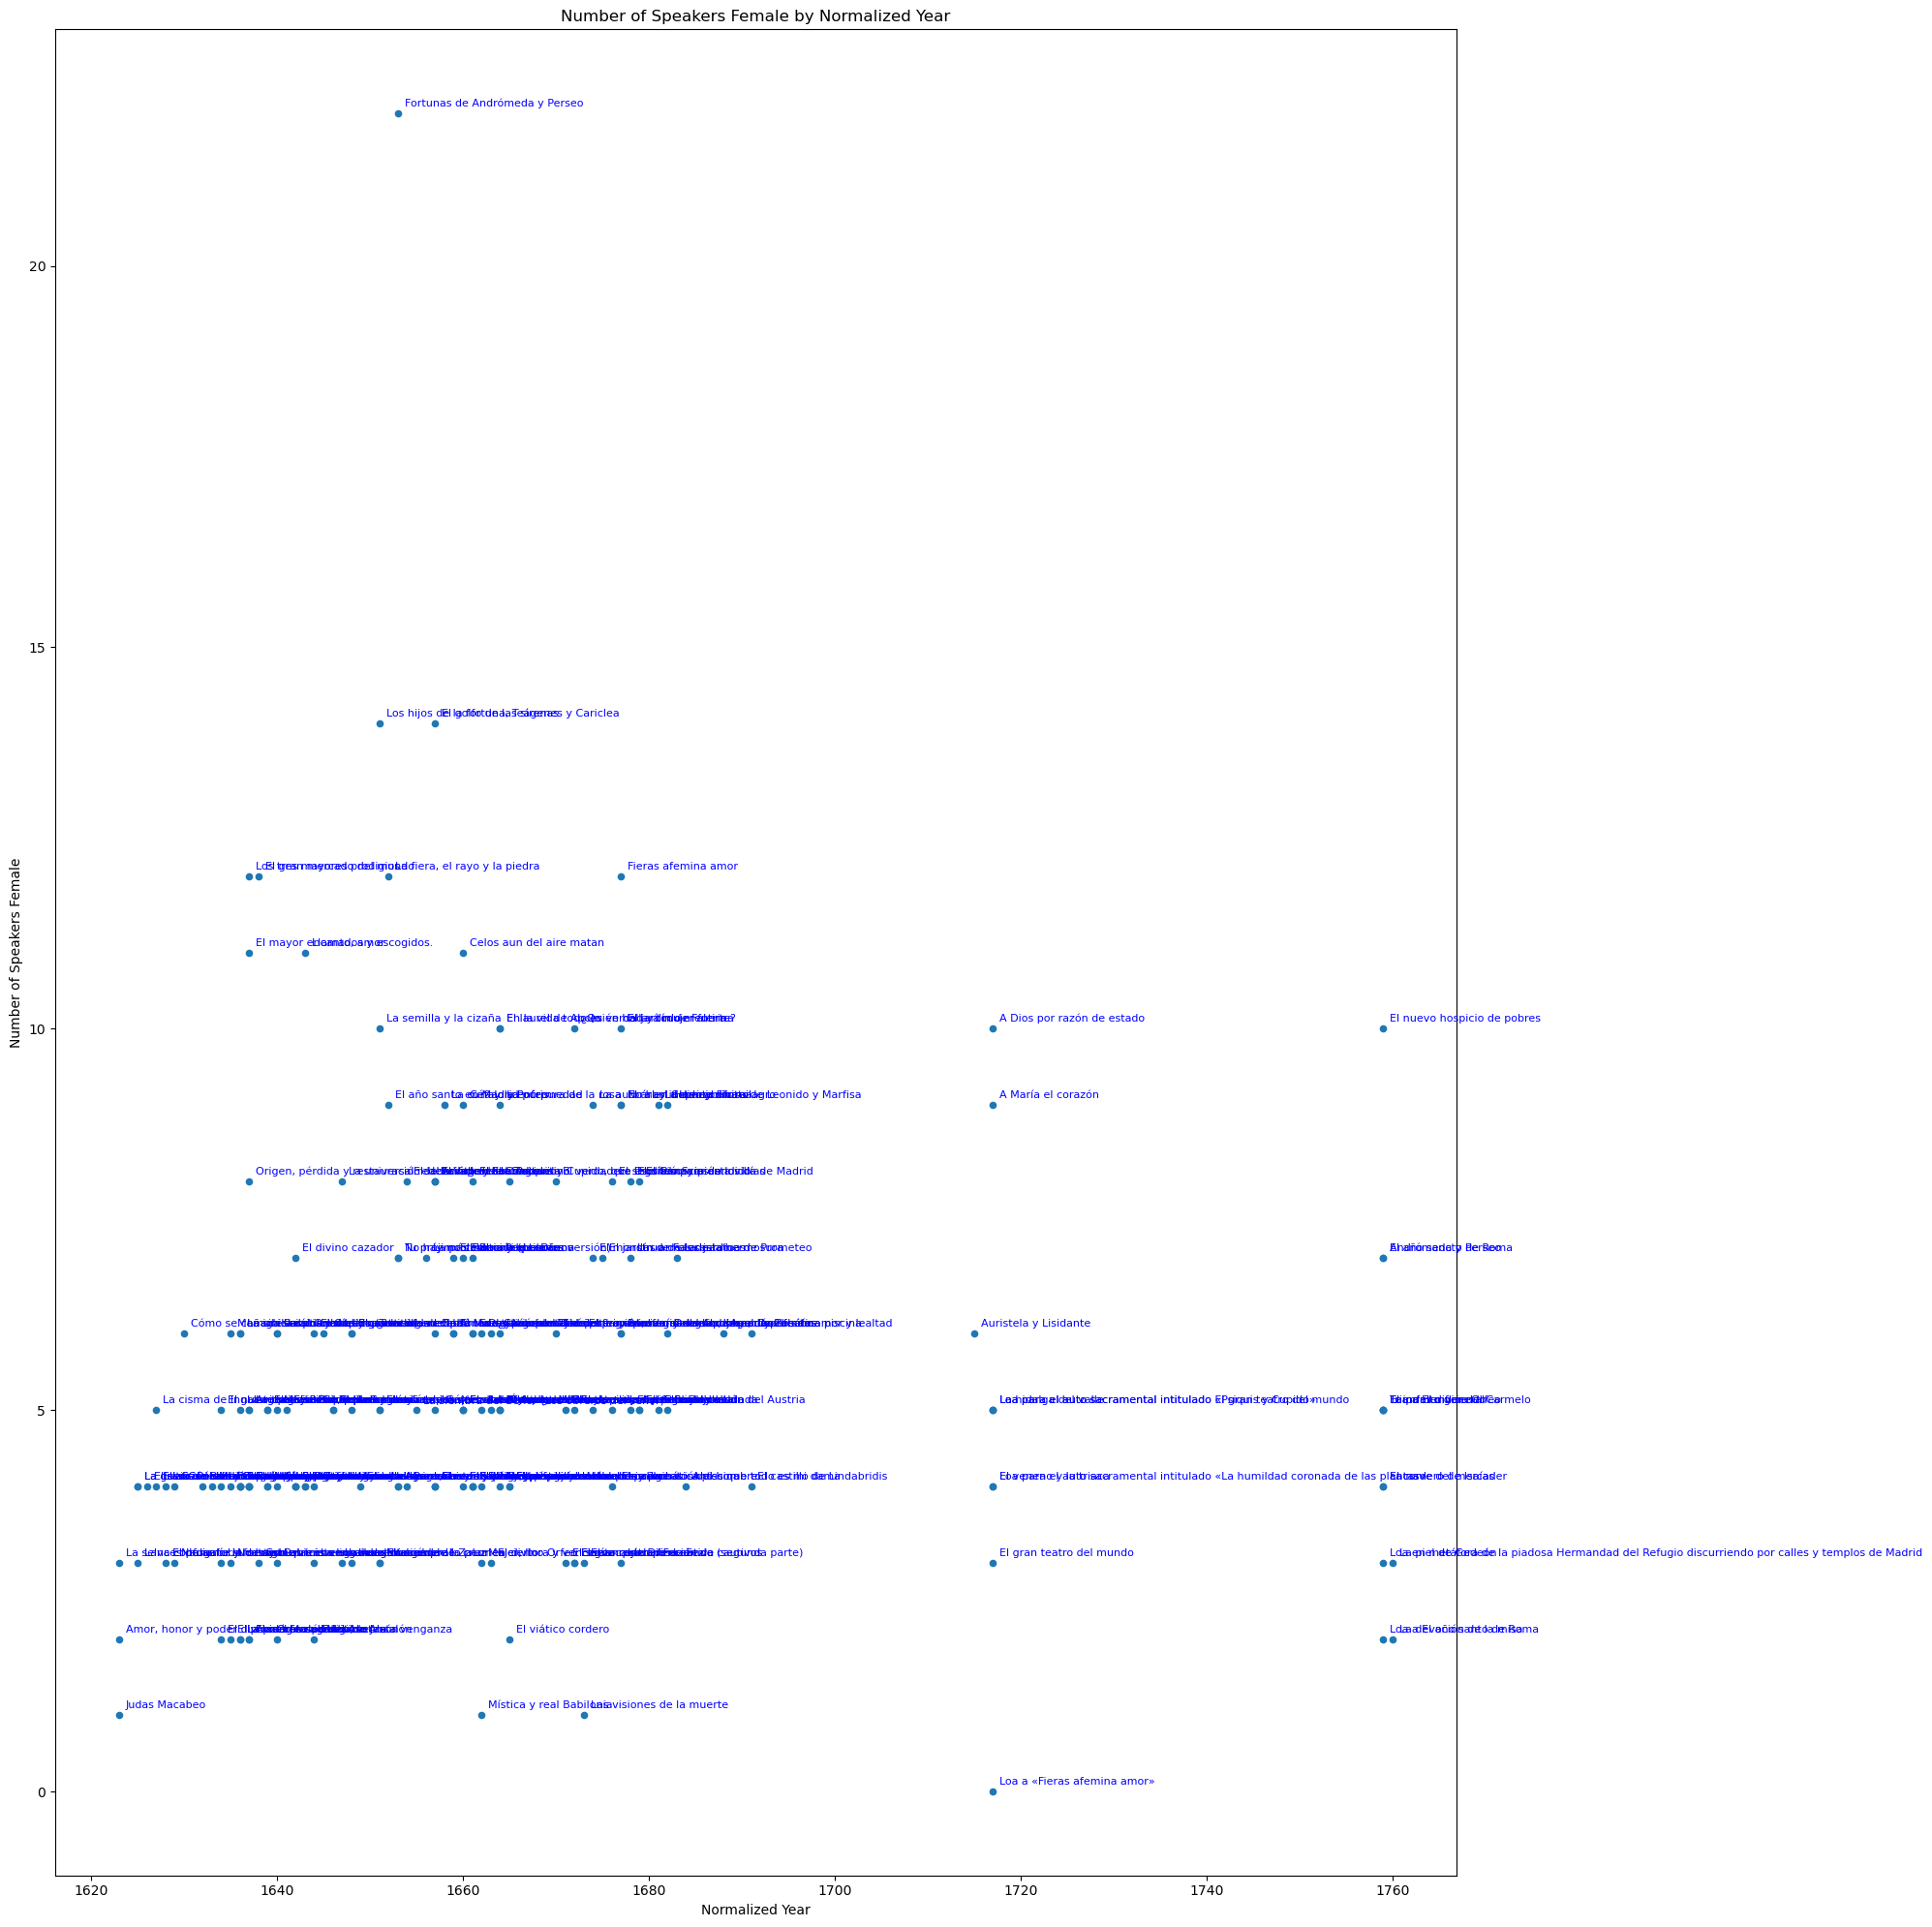

In [92]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="numOfSpeakersFemale", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSpeakersFemale"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Speakers Female")
ax.set_title("Number of Speakers Female by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_speakers_female_by_year.jpg", format="jpg")
plt.show()

#### Number of Speakers Male

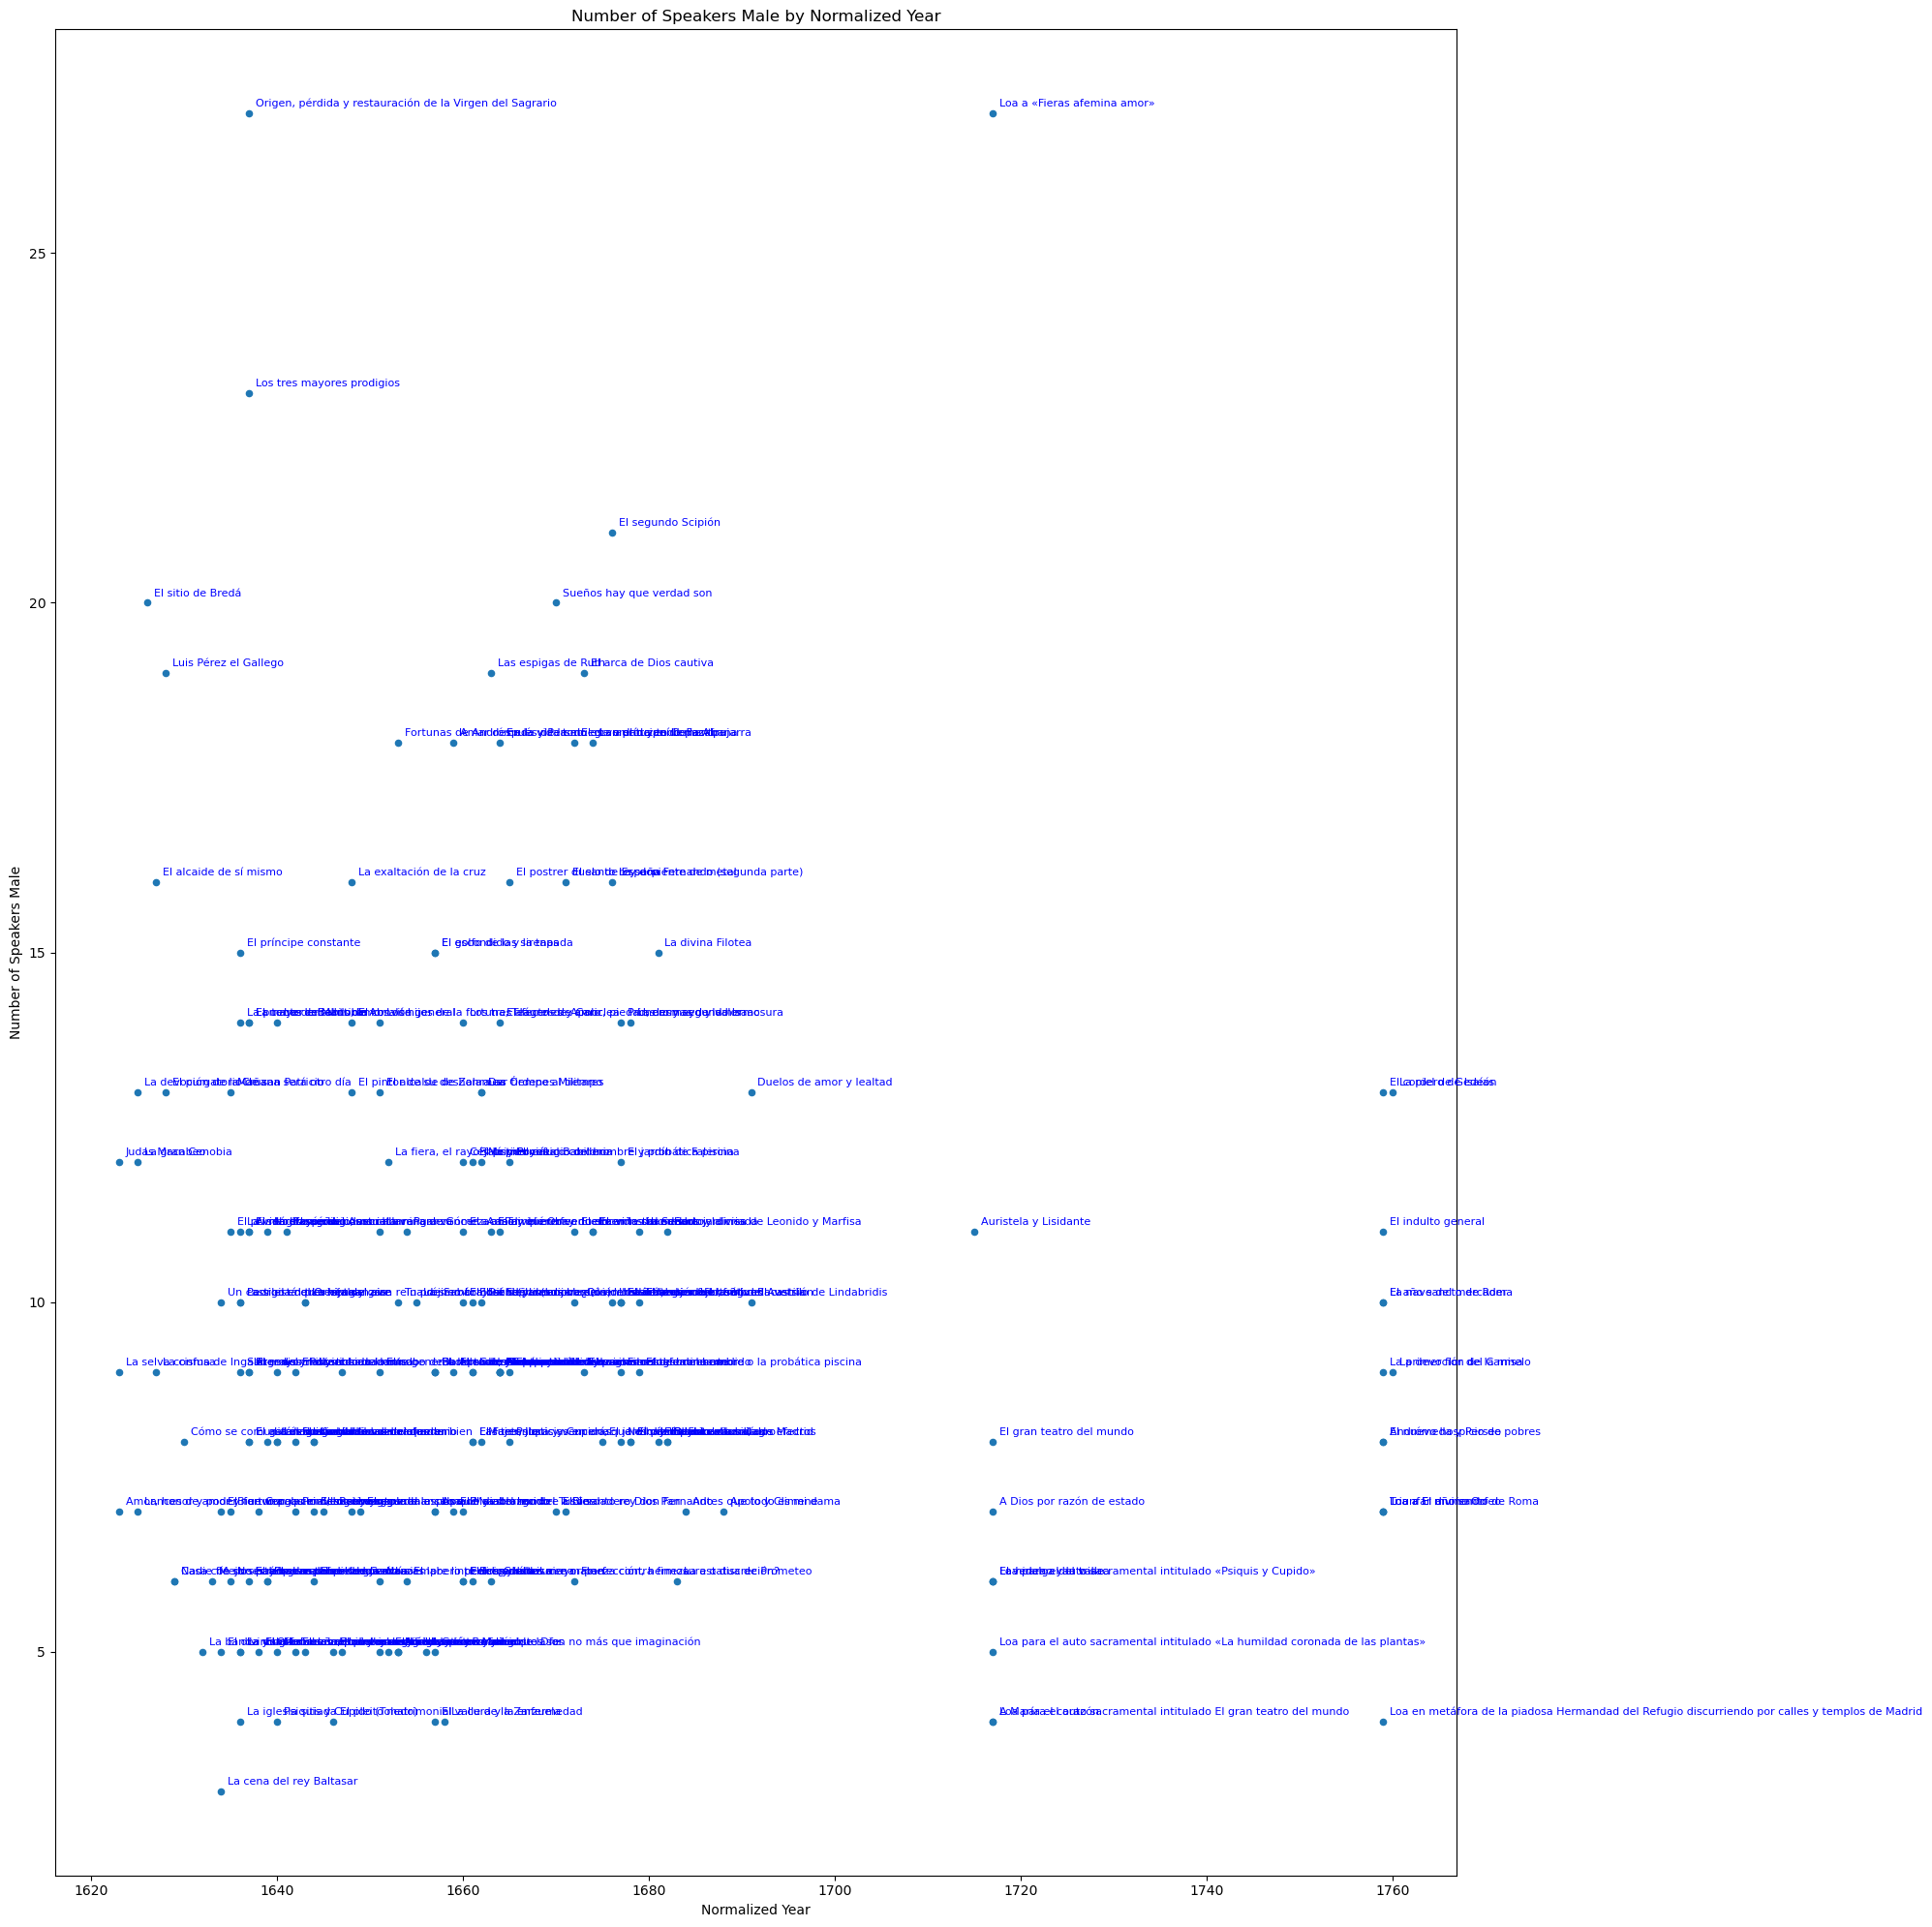

In [90]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="numOfSpeakersMale", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSpeakersMale"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Speakers Male")
ax.set_title("Number of Speakers Male by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_speakers_male_by_year.jpg", format="jpg")
plt.show()

In [ ]:
#### Number of Person Groups

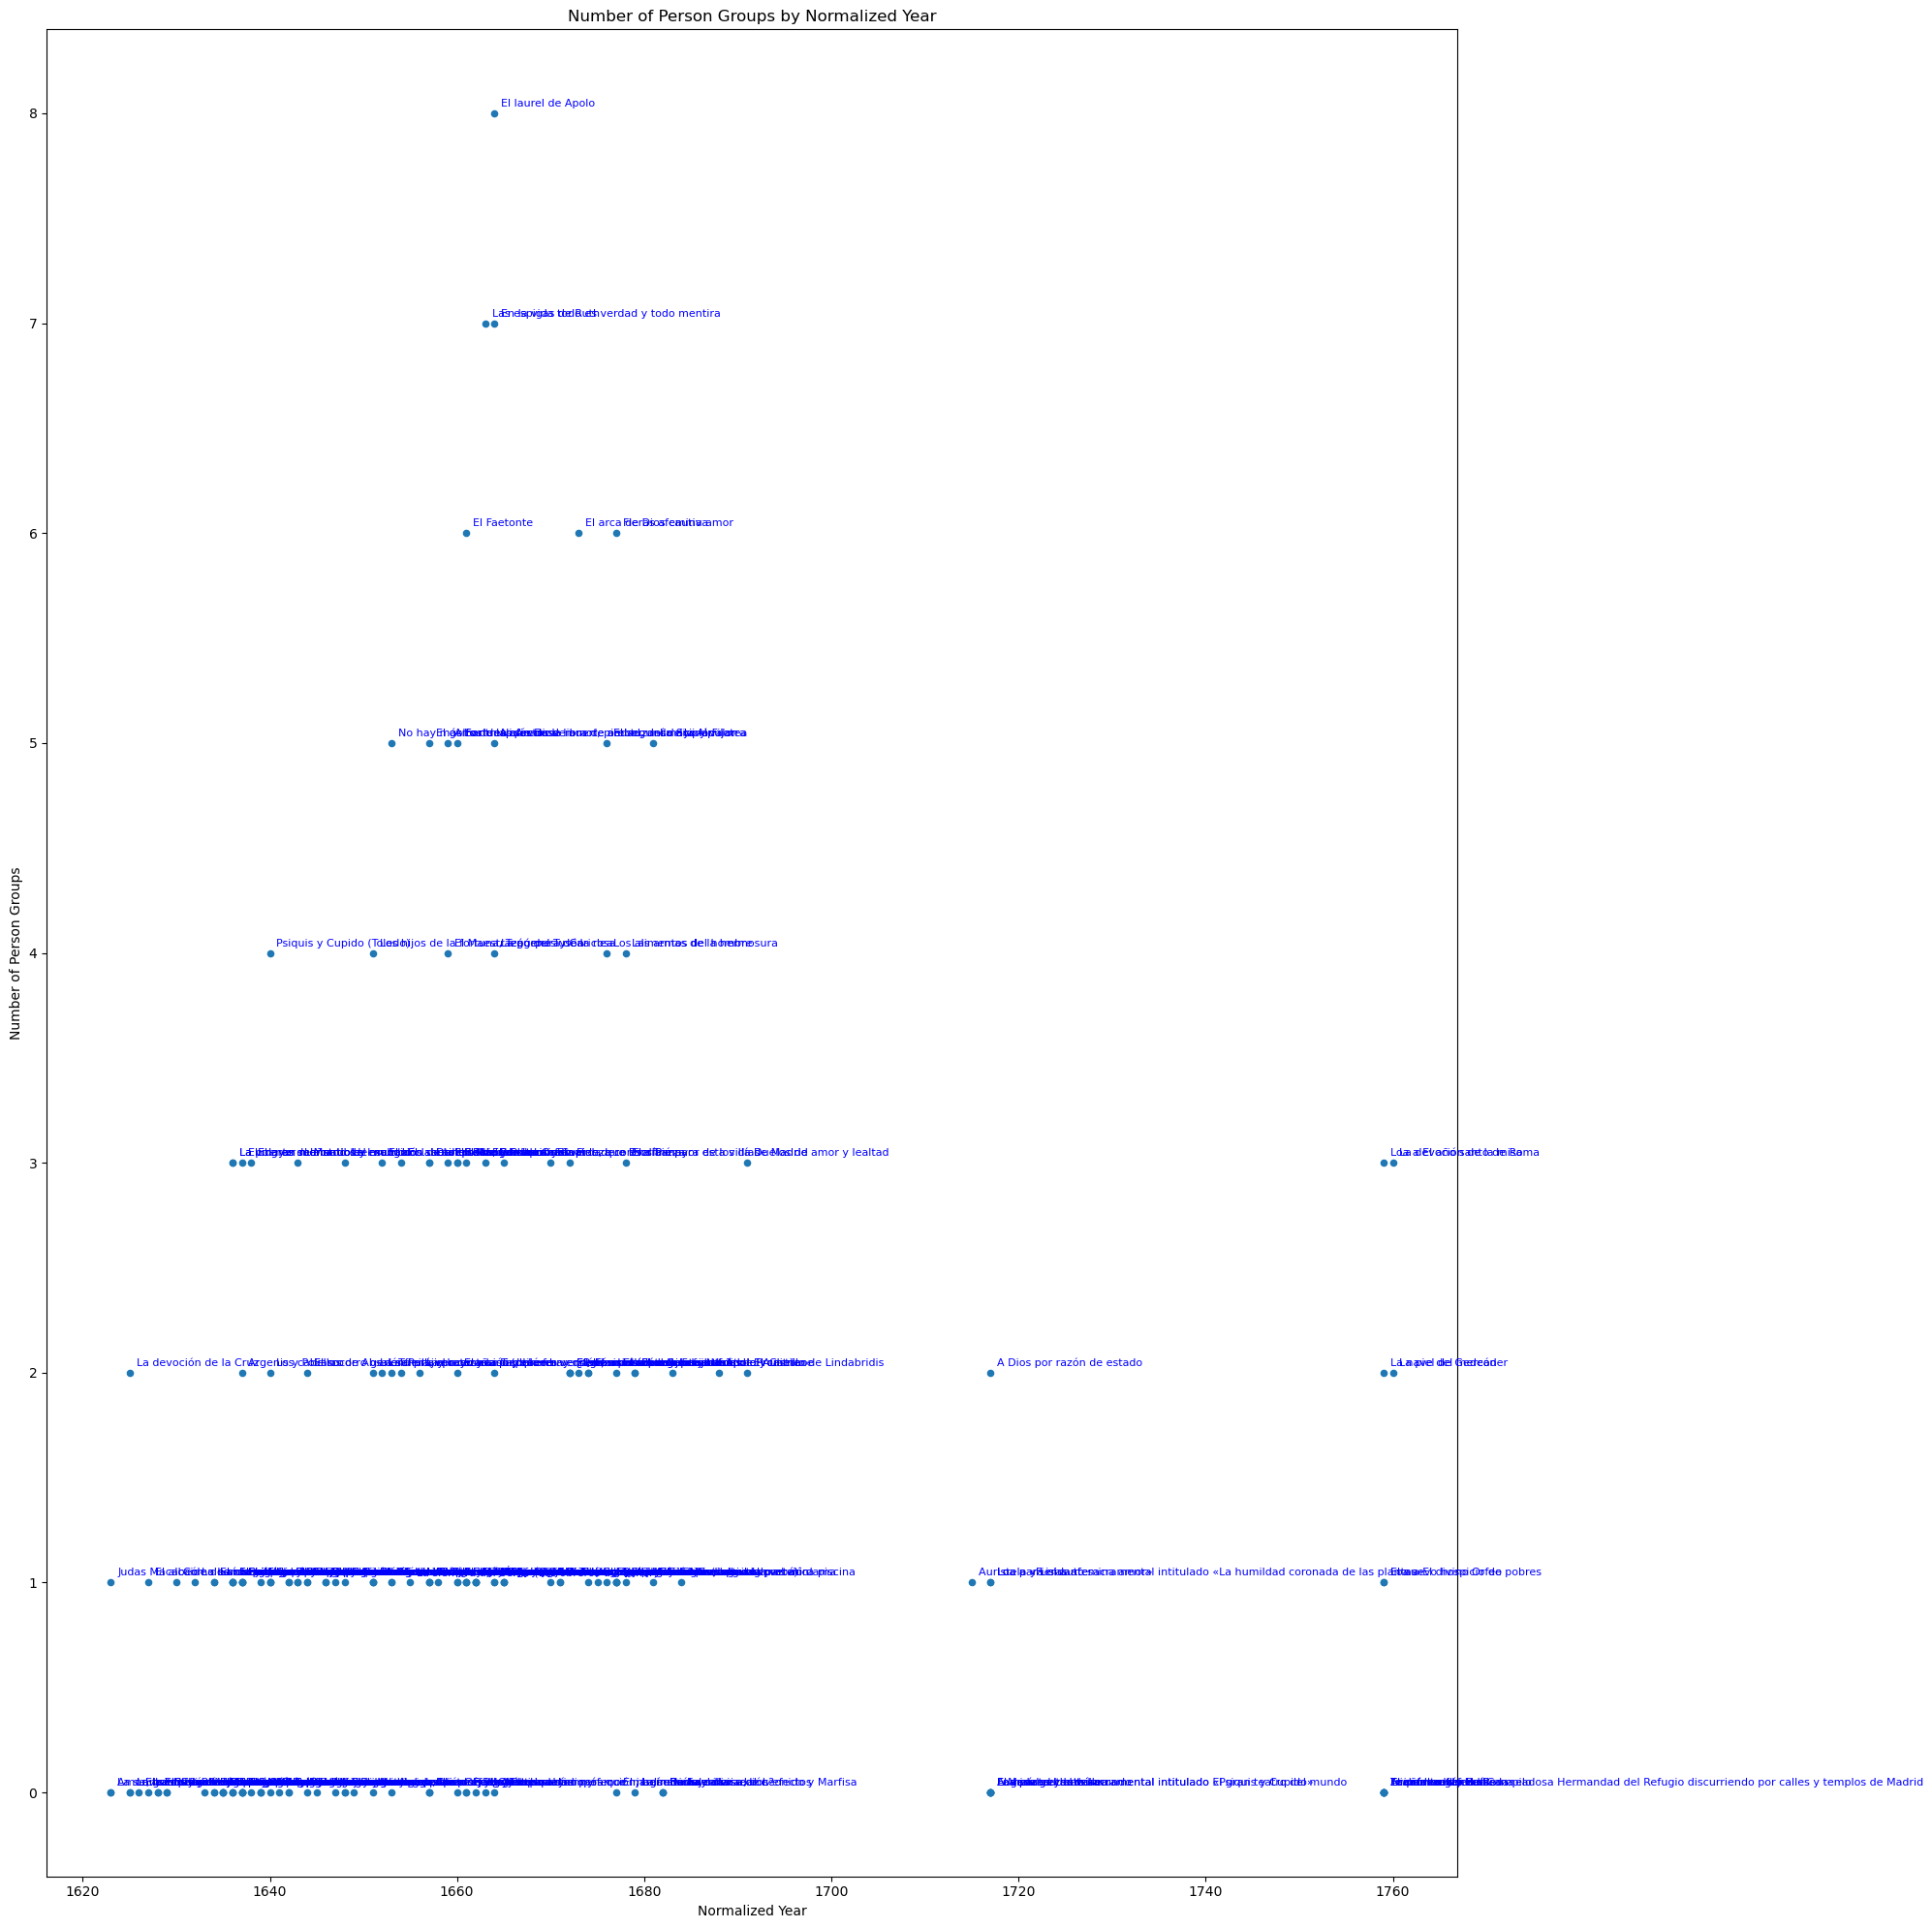

In [81]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="numOfPersonGroups", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfPersonGroups"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Person Groups")
ax.set_title("Number of Person Groups by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_person_group_by_year.jpg", format="jpg")
plt.show()

### Number of Segments

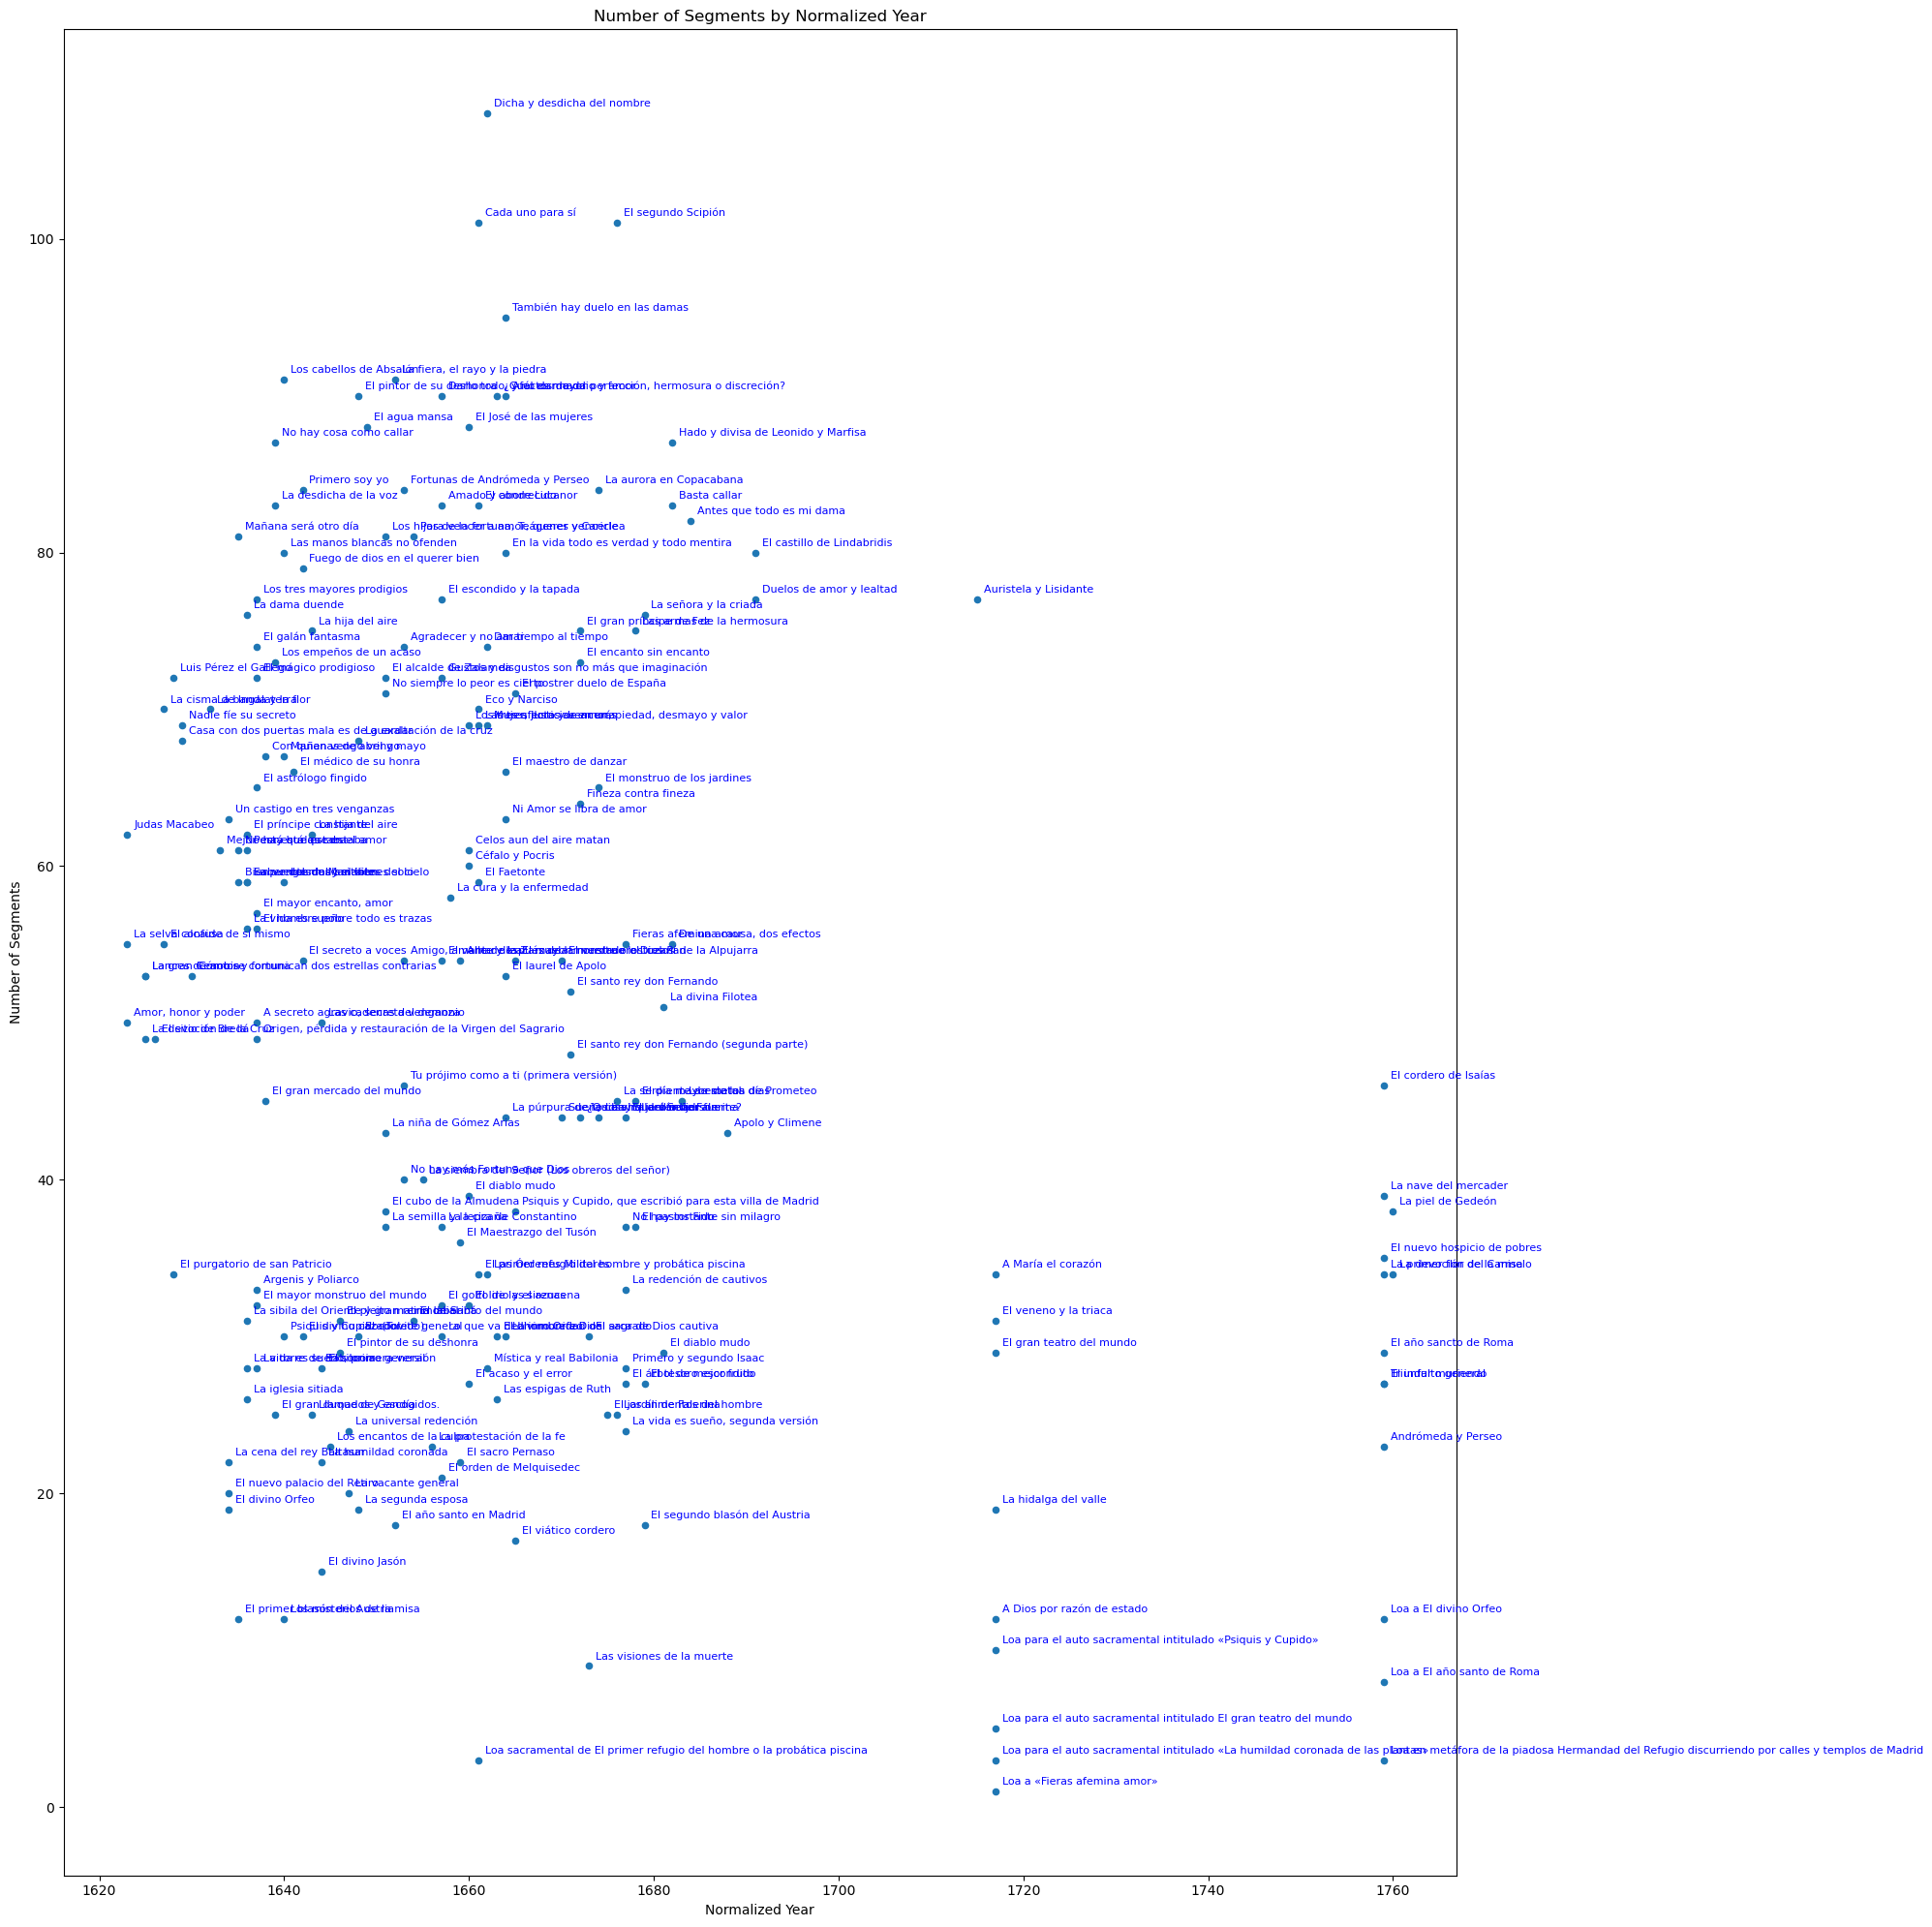

In [85]:
# Create the scatter plot (adding a larger figure for clarity)
ax = metadata_df.plot(x="yearNormalized", y="numOfSegments", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in metadata_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSegments"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Segments")
ax.set_title("Number of Segments by Normalized Year")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_segments_by_year.jpg", format="jpg")
plt.show()

#### Number of segments (filtered between 1620 and 1640)

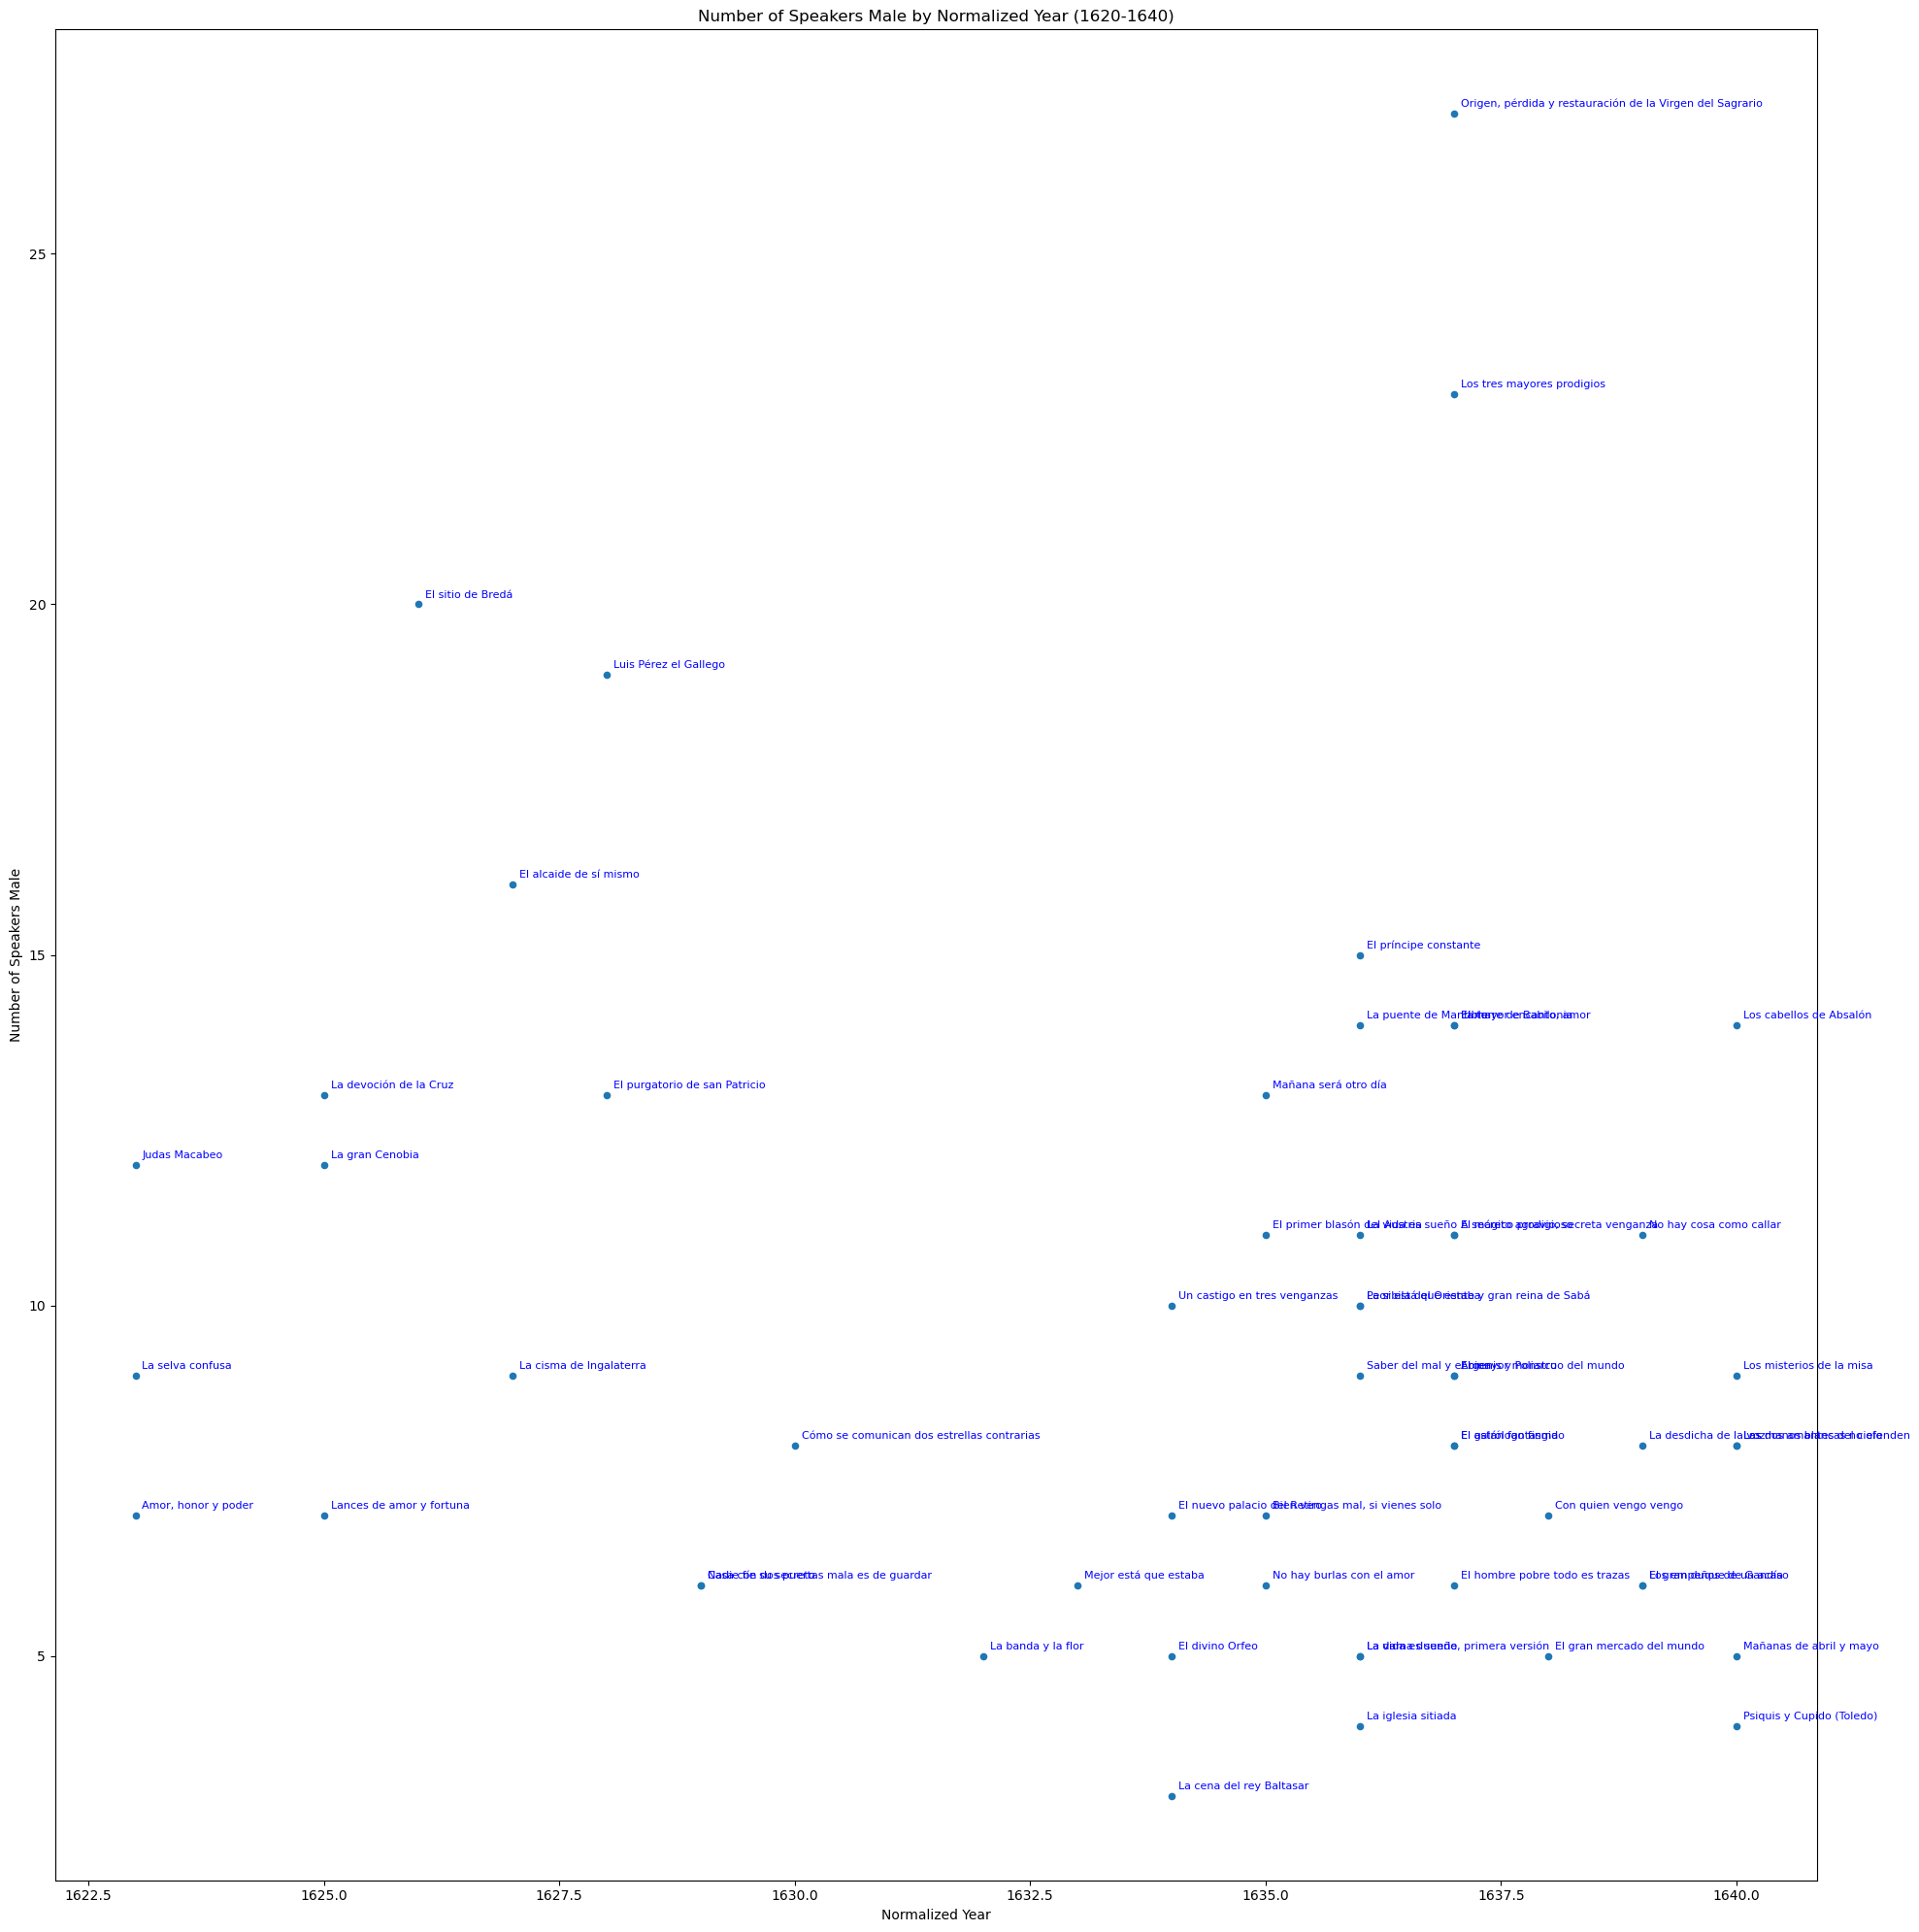

In [84]:
# Filter the DataFrame to only include entries with yearNormalized between 1620 and 1640
filtered_df = metadata_df[(metadata_df["yearNormalized"] >= 1620) & (metadata_df["yearNormalized"] <= 1640)]

# Create the scatter plot using the filtered DataFrame
ax = filtered_df.plot(x="yearNormalized", y="numOfSpeakersMale", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in filtered_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSpeakersMale"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Speakers Male")
ax.set_title("Number of Speakers Male by Normalized Year (1620-1640)")

# Adjust layout, save, and show the plot
plt.tight_layout()
plt.savefig("number_of_speakers_male_by_year_filtered.jpg", format="jpg")
plt.show()


### Number of Speakers between 1620 and 1640

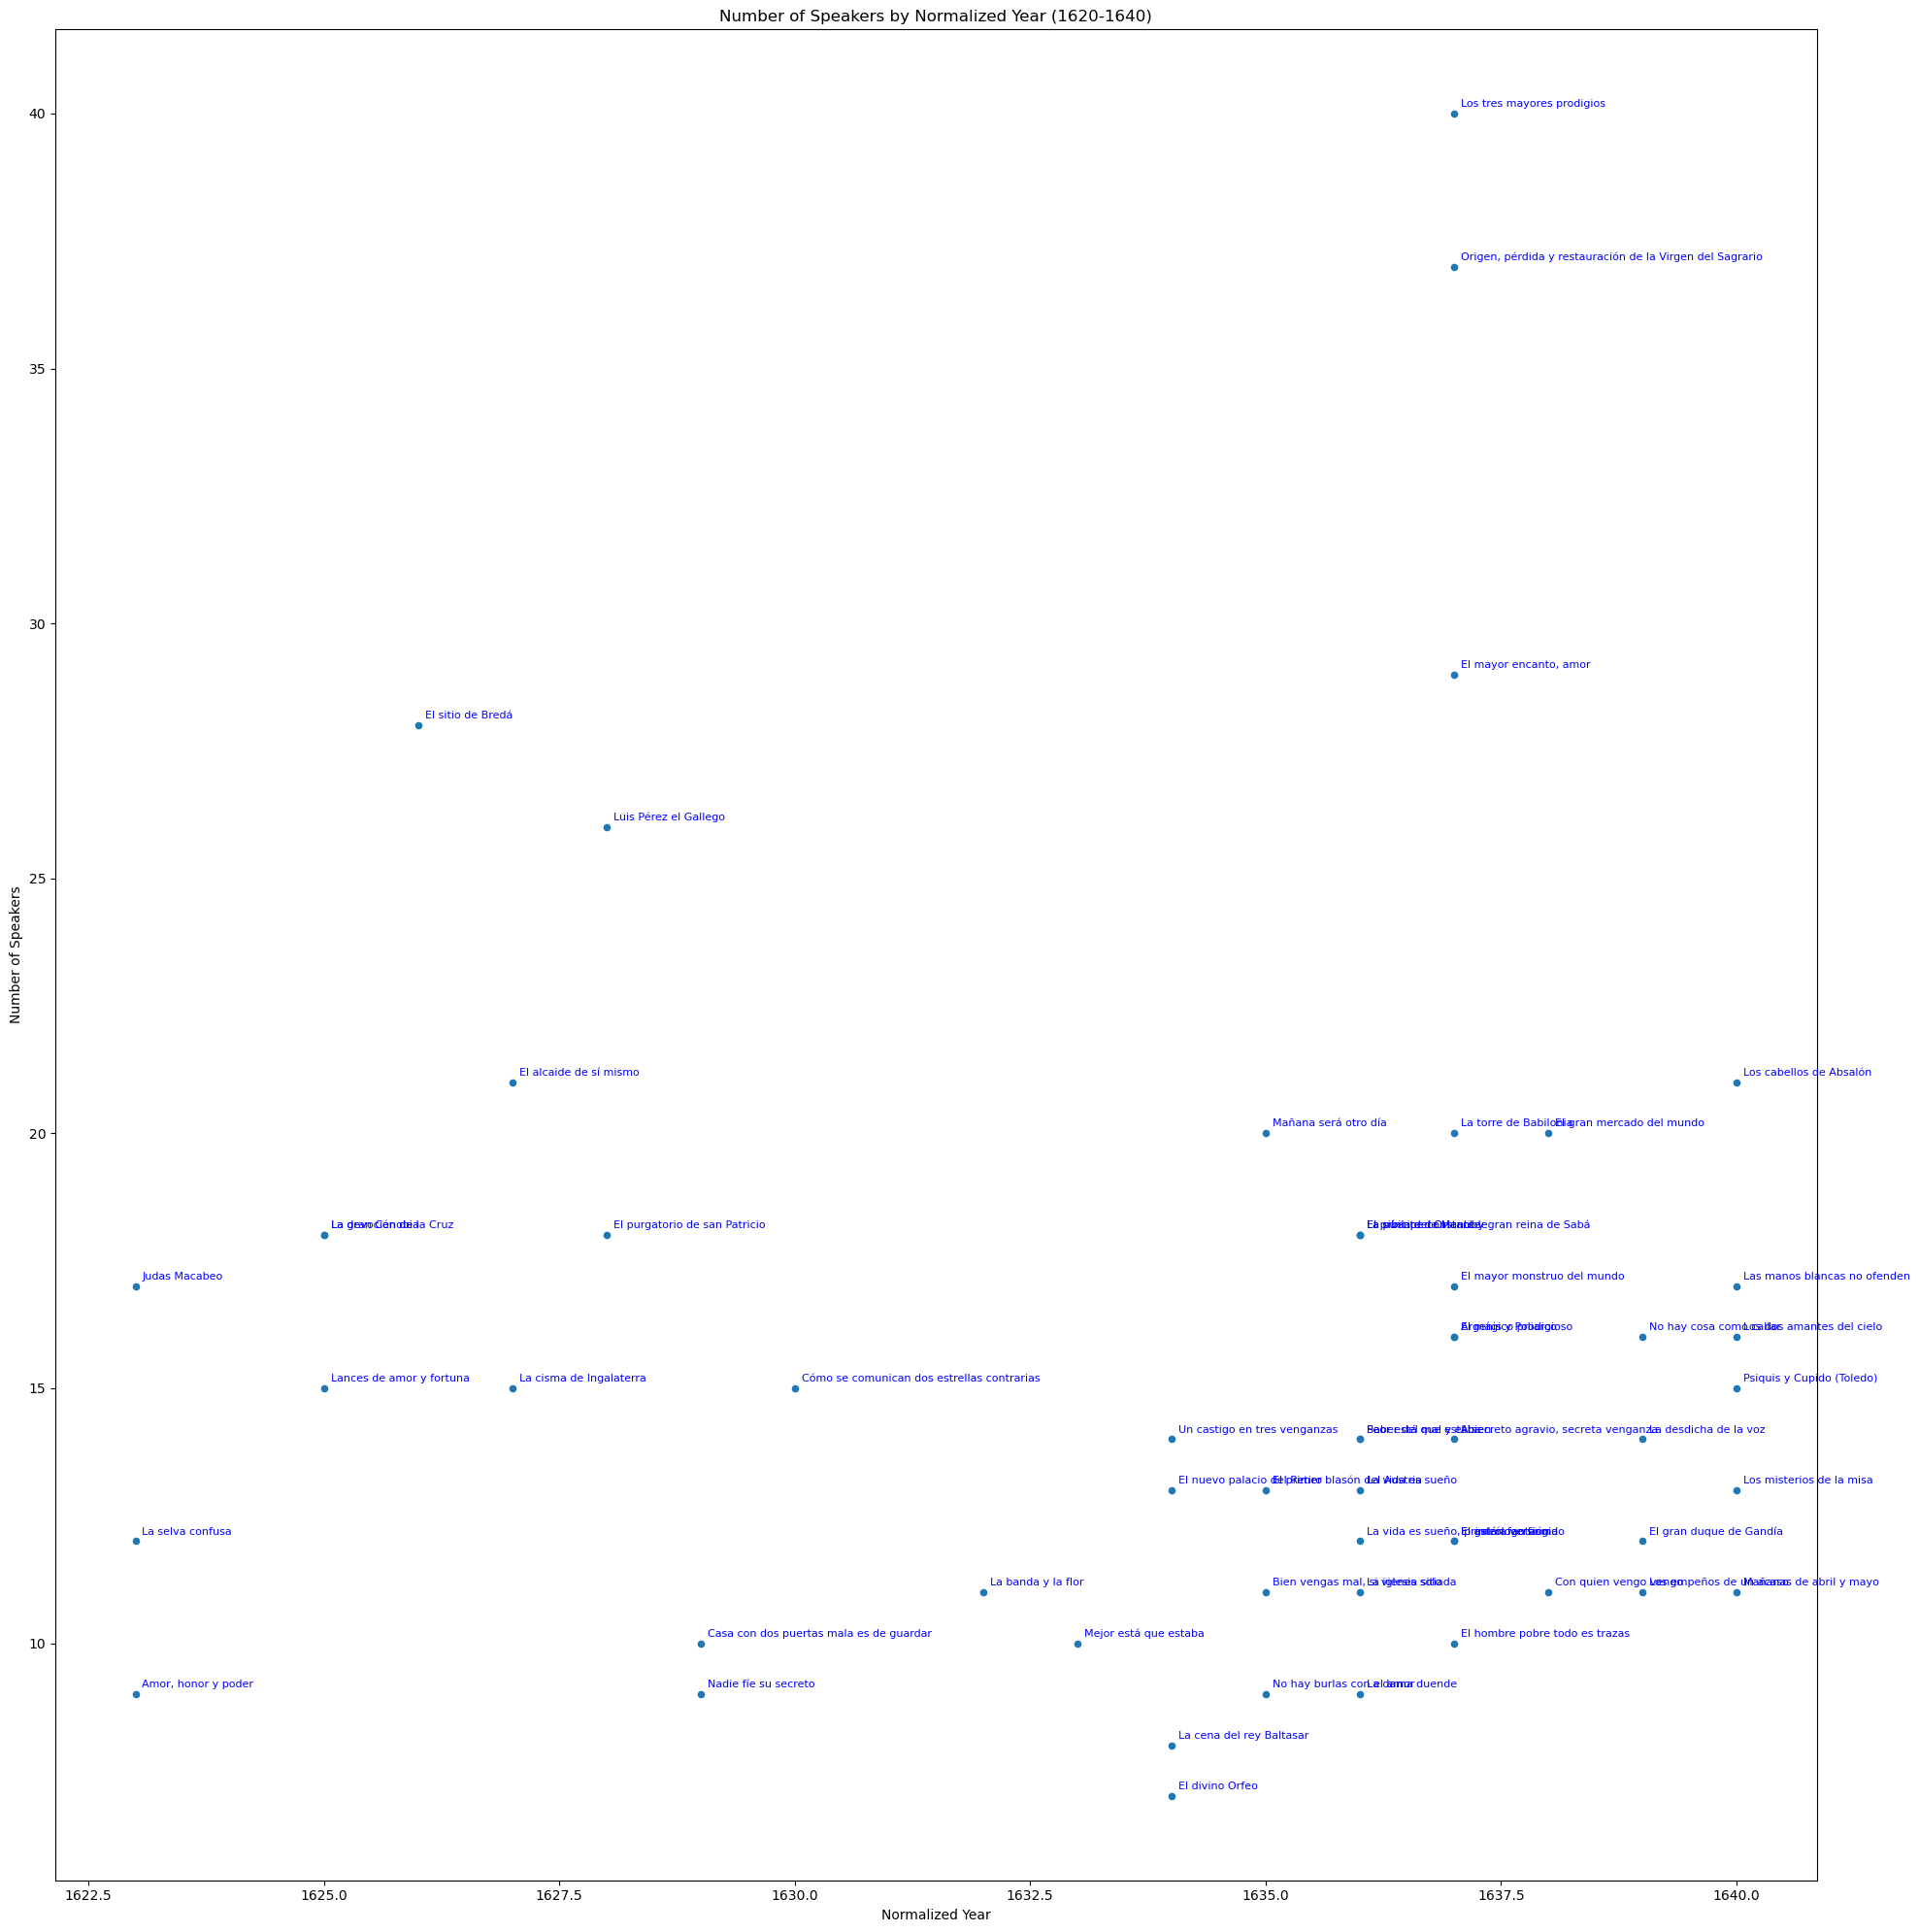

In [93]:
import matplotlib.pyplot as plt

# Filter the DataFrame to only include entries with yearNormalized between 1620 and 1640
filtered_df = metadata_df[(metadata_df["yearNormalized"] >= 1620) & (metadata_df["yearNormalized"] <= 1640)]

# Create the scatter plot using the filtered DataFrame
ax = filtered_df.plot(x="yearNormalized", y="numOfSpeakers", kind="scatter", figsize=(20, 20))

# Annotate each point with the corresponding 'title'
for index, row in filtered_df.iterrows():
    ax.annotate(
        text=row["title"],
        xy=(row["yearNormalized"], row["numOfSpeakers"]),
        textcoords="offset points",
        xytext=(5, 5),  # adjust offset as needed
        ha="left",
        fontsize=8,
        color="blue"
    )

# Set custom axis labels and title
ax.set_xlabel("Normalized Year")
ax.set_ylabel("Number of Speakers")
ax.set_title("Number of Speakers by Normalized Year (1620-1640)")

# Adjust layout, save and show the plot
plt.tight_layout()
plt.savefig("number_of_speakers_by_year.jpg", format="jpg")
plt.show()
